In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
pop_df = pd.read_csv("remove_min_cost.csv")
pop_df
pop_df["heap"]

0         48
1         96
2        154
3        201
4        248
       ...  
995    40863
996    40882
997    40901
998    40920
999    40939
Name: heap, Length: 1000, dtype: int64

In [8]:
push_df = pd.read_csv("push.csv")
push_df

,beap,heap
0,191,29
1,229,57
2,267,77
3,315,105
4,373,134
...,...,...
995,57606,23207
996,57625,23236
997,57711,23255
998,57730,23293


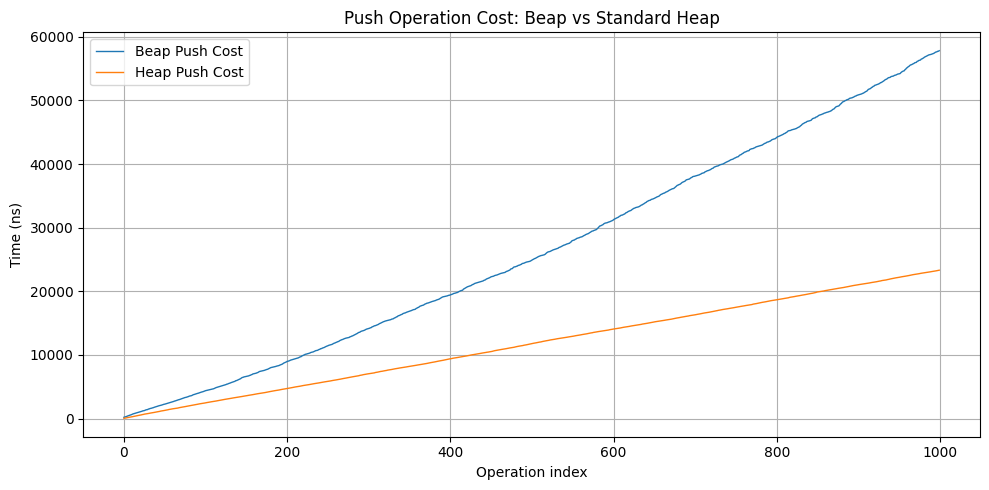

In [9]:
# PUSH COSTS
plt.figure(figsize=(10, 5))
plt.plot(push_df["beap"], label="Beap Push Cost", linewidth=1)
plt.plot(push_df["heap"], label="Heap Push Cost", linewidth=1)
plt.xlabel("Operation index")
plt.ylabel("Time (ns)")
plt.title("Push Operation Cost: Beap vs Standard Heap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



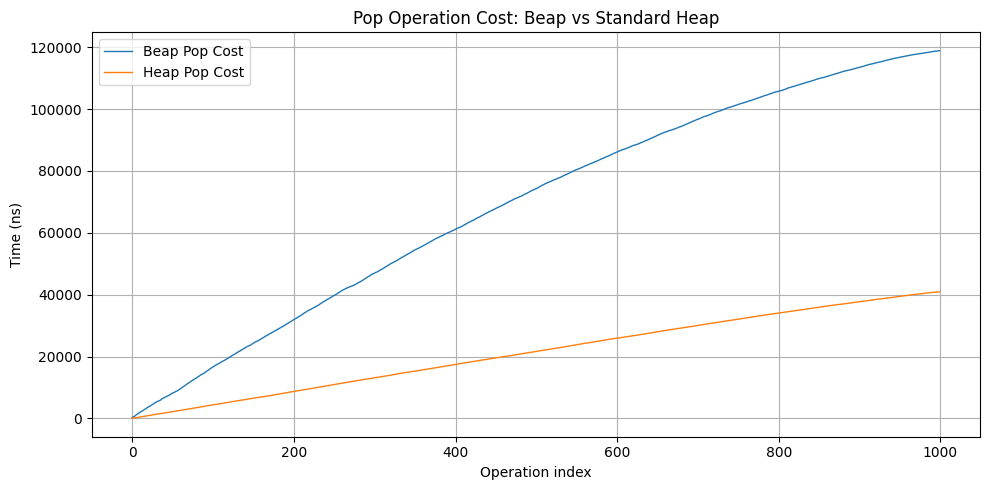

In [10]:
# POP COSTS
plt.figure(figsize=(10, 5))
plt.plot(pop_df["beap"], label="Beap Pop Cost", linewidth=1)
plt.plot(pop_df["heap"], label="Heap Pop Cost", linewidth=1)
plt.xlabel("Operation index")
plt.ylabel("Time (ns)")
plt.title("Pop Operation Cost: Beap vs Standard Heap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

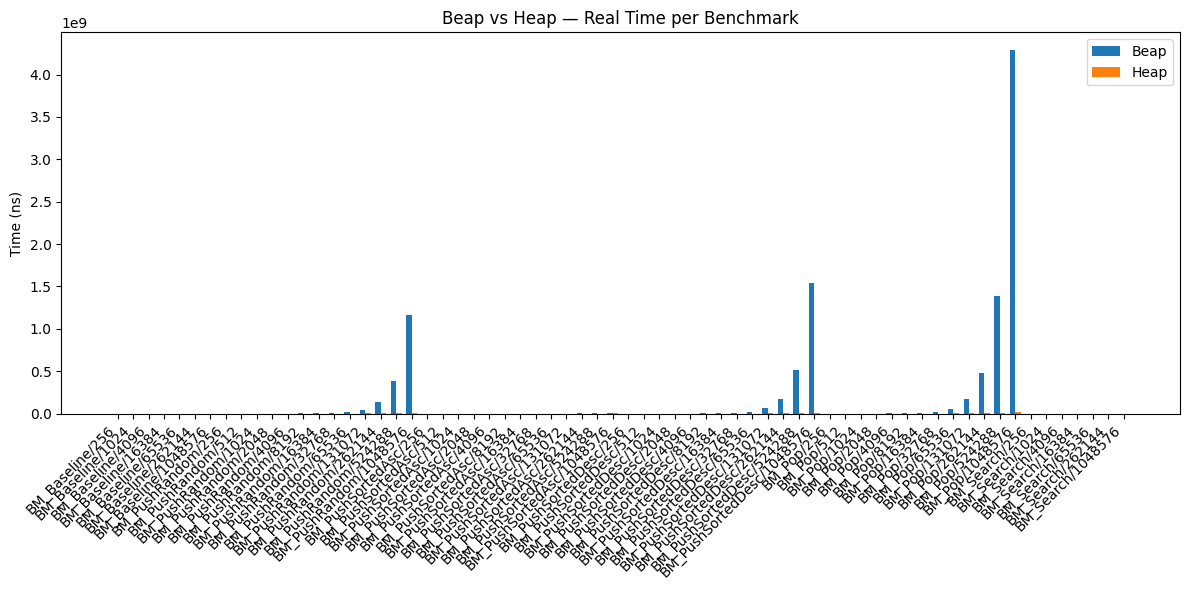

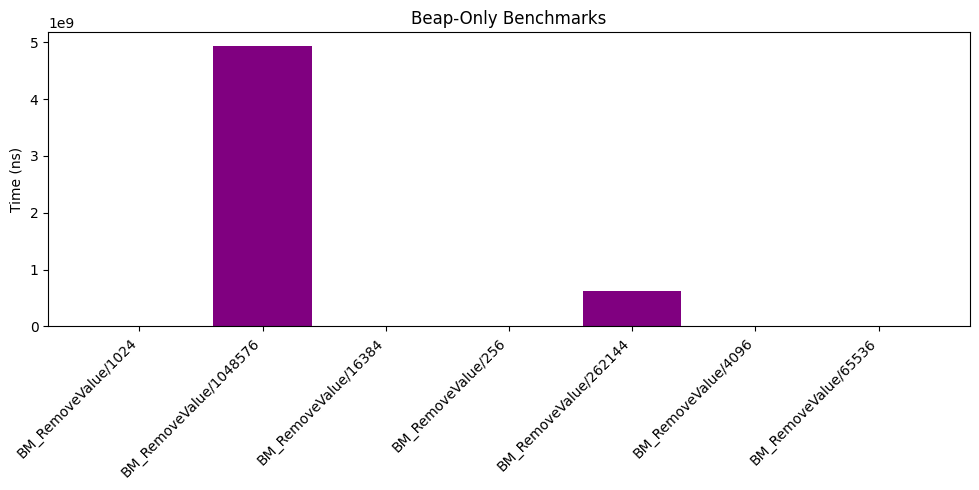

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# Load CSV files
# ------------------------------------------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# We will compare using real_time (ns)
heap_times = heap_df.set_index("name")["real_time"]
beap_times = beap_df.set_index("name")["real_time"]

# ------------------------------------------------------------
# 1. Plot only benchmarks present in BOTH heap and beap
# ------------------------------------------------------------
common_names = heap_times.index.intersection(beap_times.index)

heap_common = heap_times[common_names]
beap_common = beap_times[common_names]

x = np.arange(len(common_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, beap_common, width, label="Beap")
plt.bar(x + width/2, heap_common, width, label="Heap")

plt.xticks(x, common_names, rotation=45, ha="right")
plt.ylabel("Time (ns)")
plt.title("Beap vs Heap — Real Time per Benchmark")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2. Plot benchmarks that ONLY exist in Beap results
# ------------------------------------------------------------
beap_only_names = beap_times.index.difference(heap_times.index)
beap_only = beap_times[beap_only_names]

plt.figure(figsize=(10, 5))
plt.bar(beap_only.index, beap_only.values, color="purple")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Time (ns)")
plt.title("Beap-Only Benchmarks")
plt.tight_layout()
plt.show()


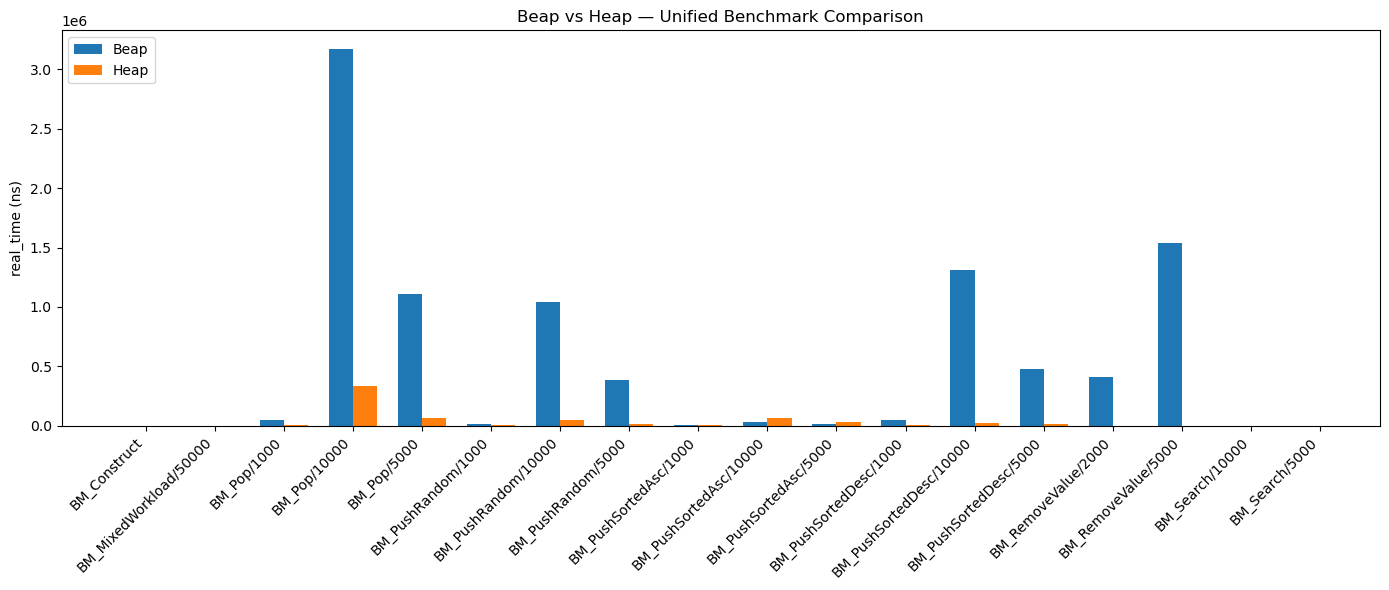

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Load CSV files
# -----------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Set index to names
heap_times = heap_df.set_index("name")["real_time"]
beap_times = beap_df.set_index("name")["real_time"]

# -----------------------------
# Build a combined DataFrame
# -----------------------------
combined = pd.DataFrame({
    "Beap": beap_times,
    "Heap": heap_times
})

# Keep all rows (union of names)
combined = combined.sort_index()

# -----------------------------
# Plot as ONE BAR CHART
# -----------------------------
plt.figure(figsize=(14, 6))

x = np.arange(len(combined.index))
width = 0.35

plt.bar(x - width/2, combined["Beap"], width, label="Beap")
plt.bar(x + width/2, combined["Heap"], width, label="Heap")

plt.xticks(x, combined.index, rotation=45, ha="right")
plt.ylabel("real_time (ns)")
plt.title("Beap vs Heap — Unified Benchmark Comparison")
plt.legend()
plt.tight_layout()
plt.show()


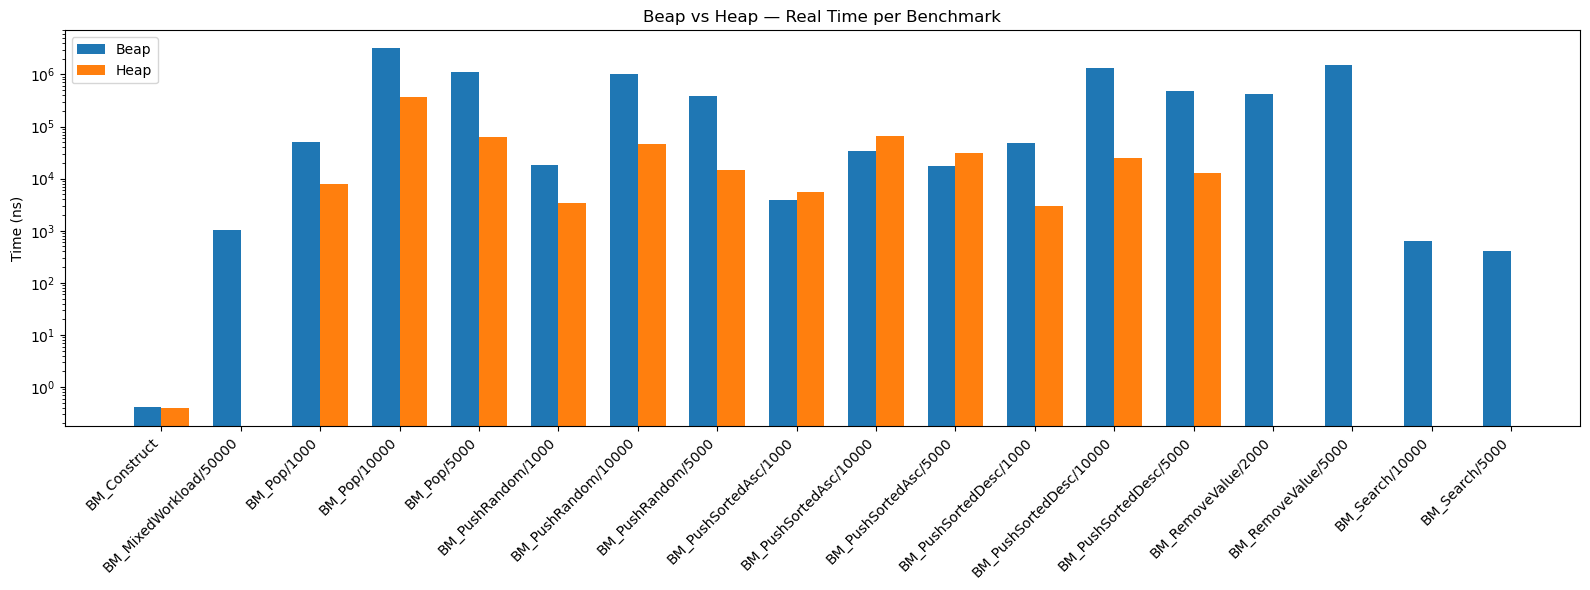

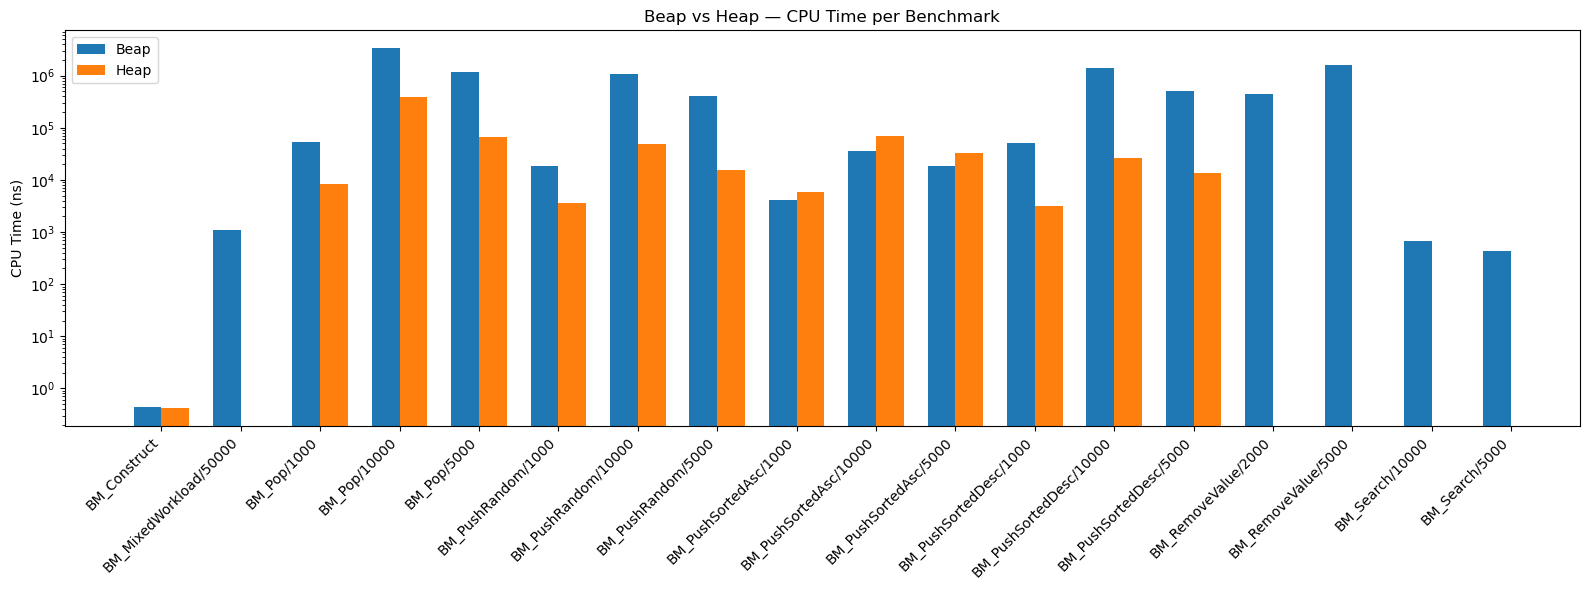

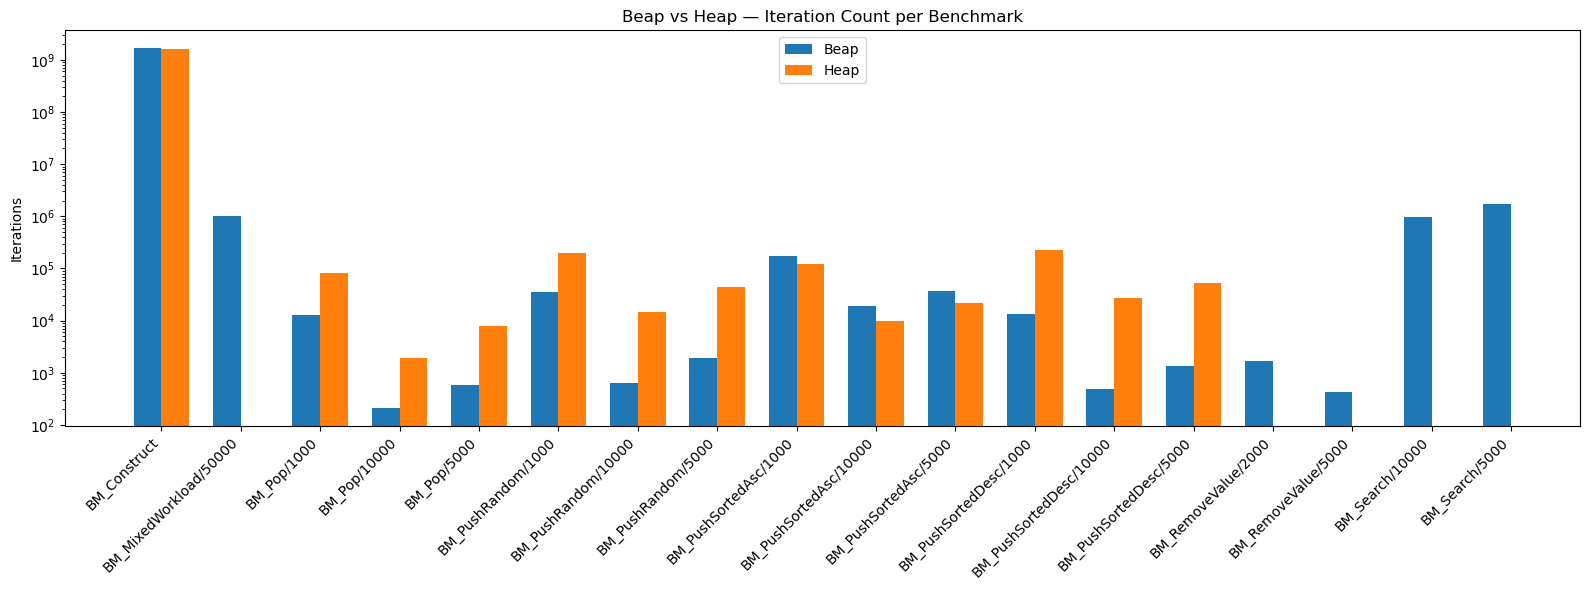

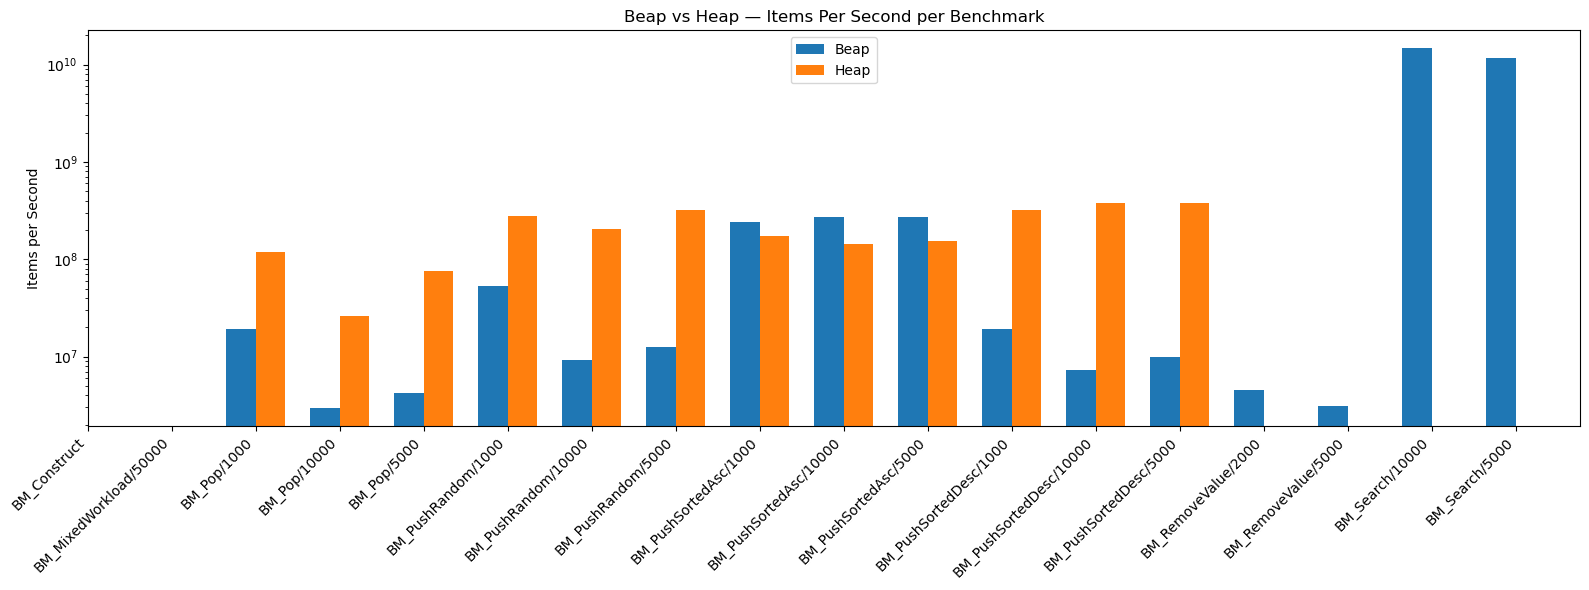

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Load data
# -------------------------------------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Set index by name for easy alignment
heap_df = heap_df.set_index("name")
beap_df = beap_df.set_index("name")

# All benchmark names (union)
all_names = beap_df.index.union(heap_df.index)

# -------------------------------------------------------
# Helper to plot a unified bar chart for ANY metric
# -------------------------------------------------------
def plot_metric(metric, ylabel, title, logscale=False):
    combined = pd.DataFrame({
        "Beap": beap_df.get(metric),
        "Heap": heap_df.get(metric)
    }, index=all_names)

    combined = combined.sort_index()

    x = np.arange(len(combined.index))
    width = 0.35

    plt.figure(figsize=(16, 6))
    plt.bar(x - width/2, combined["Beap"], width, label="Beap")
    plt.bar(x + width/2, combined["Heap"], width, label="Heap")

    plt.xticks(x, combined.index, rotation=45, ha="right")
    plt.ylabel(ylabel)
    plt.title(title)

    if logscale:
        plt.yscale("log")         # ★ log-scale here

    plt.legend()
    plt.tight_layout()
    plt.show()


# Real Time (ns)
plot_metric(
    metric="real_time",
    ylabel="Time (ns)",
    title="Beap vs Heap — Real Time per Benchmark",
    logscale=True
)

# CPU Time (ns)
plot_metric(
    metric="cpu_time",
    ylabel="CPU Time (ns)",
    title="Beap vs Heap — CPU Time per Benchmark",
    logscale=True
)

# Iterations
plot_metric(
    metric="iterations",
    ylabel="Iterations",
    title="Beap vs Heap — Iteration Count per Benchmark",
    logscale=True
)

# Items Per Second
plot_metric(
    metric="items_per_second",
    ylabel="Items per Second",
    title="Beap vs Heap — Items Per Second per Benchmark",
    logscale=True
)


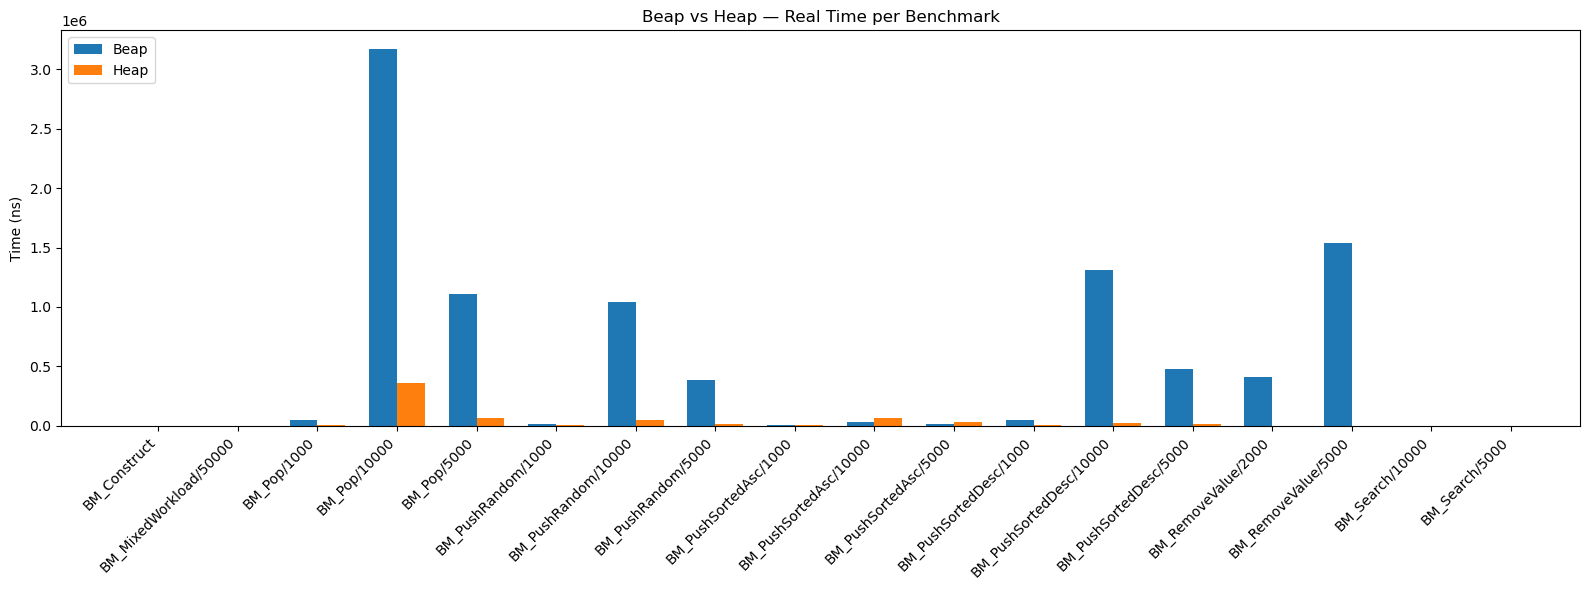

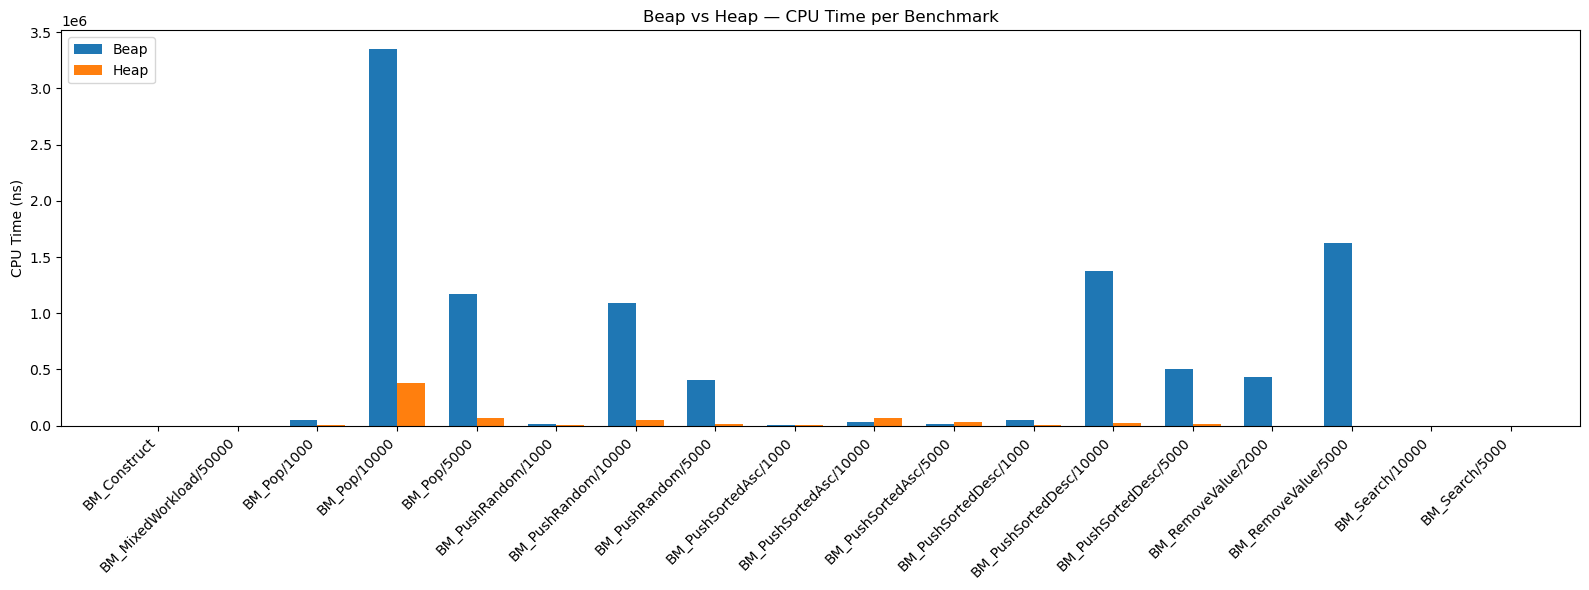

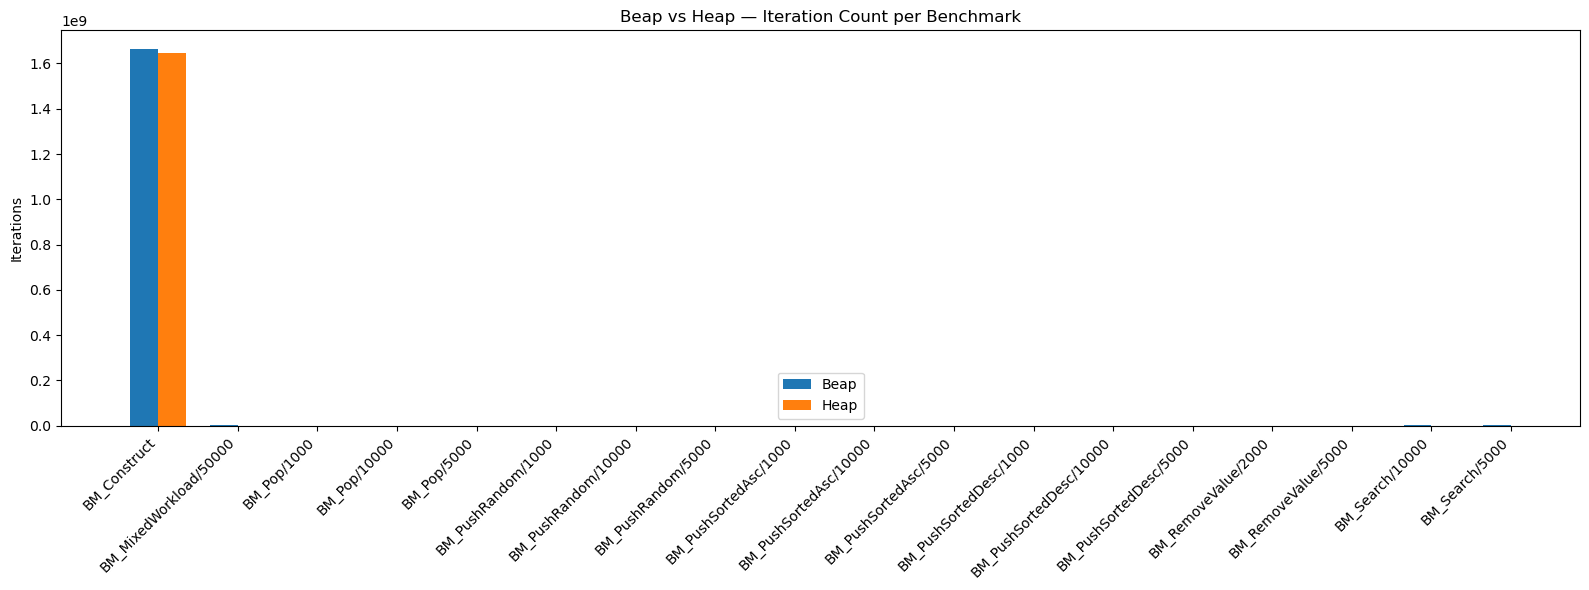

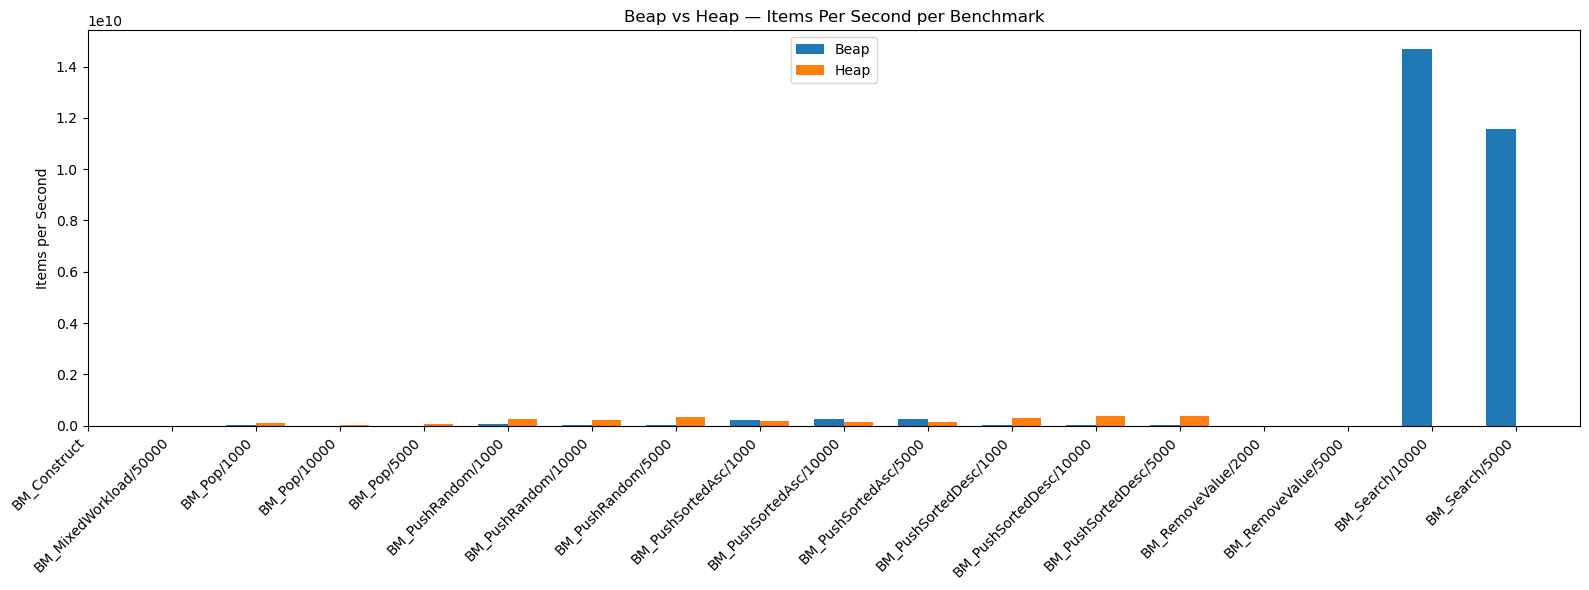

In [28]:
# Real Time (ns)
plot_metric(
    metric="real_time",
    ylabel="Time (ns)",
    title="Beap vs Heap — Real Time per Benchmark"
)

# CPU Time (ns)
plot_metric(
    metric="cpu_time",
    ylabel="CPU Time (ns)",
    title="Beap vs Heap — CPU Time per Benchmark"
)

# Iterations
plot_metric(
    metric="iterations",
    ylabel="Iterations",
    title="Beap vs Heap — Iteration Count per Benchmark"
)

# Items Per Second
plot_metric(
    metric="items_per_second",
    ylabel="Items per Second",
    title="Beap vs Heap — Items Per Second per Benchmark"
)

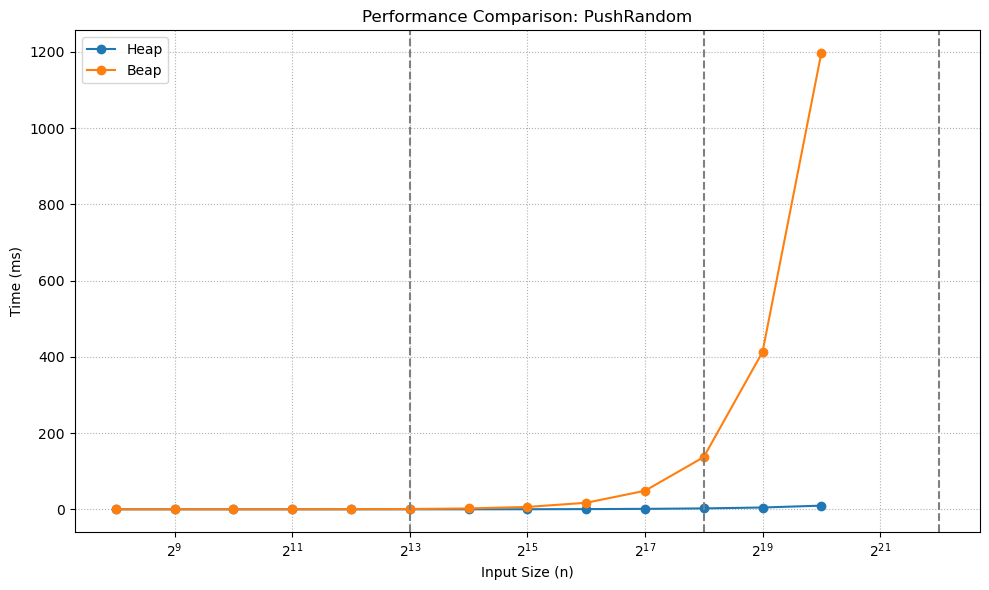

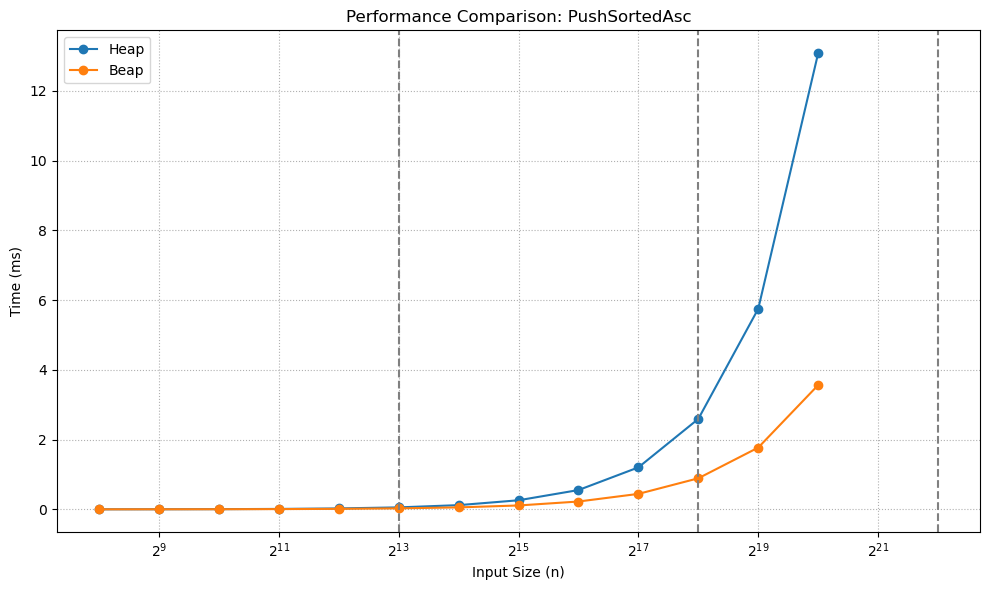

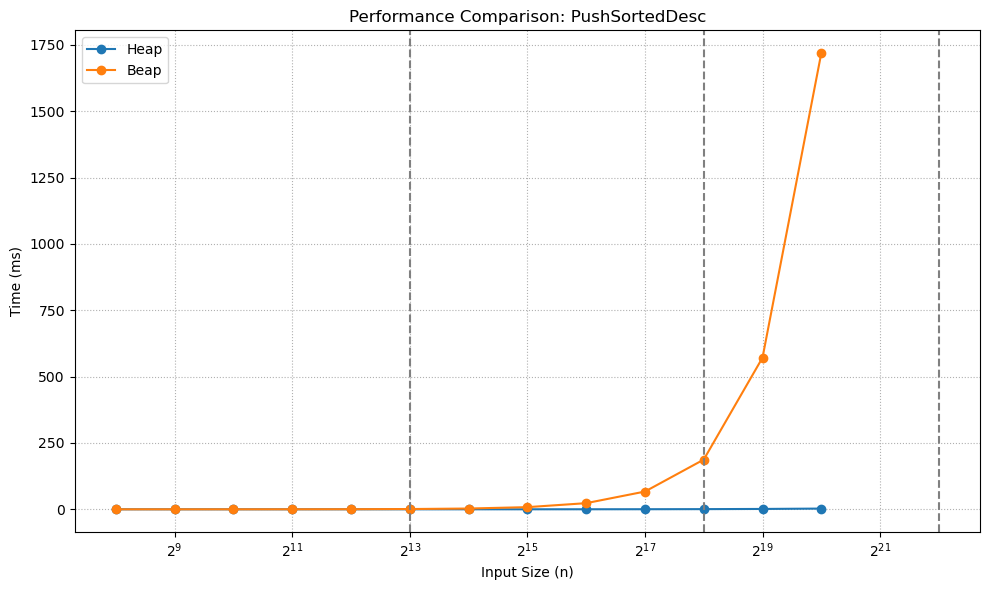

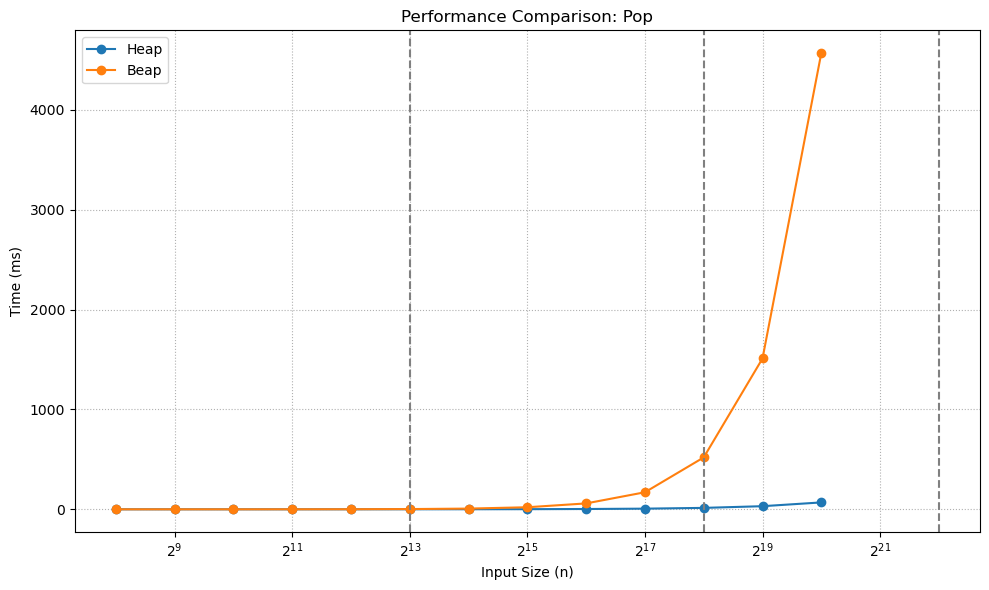

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Helper: extract operation and input size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None

for df in [heap_df, beap_df]:
    df[['op', 'size']] = df['name'].apply(lambda x: pd.Series(split_name(x)))


# Filter only Push/Pop operations
ops_to_plot = [
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
    "BM_Pop"
]

for op in ops_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Select operation subset
    heap_sub = heap_df[heap_df['op'] == op]
    beap_sub = beap_df[beap_df['op'] == op]
    
    # Sorting ensures correct line order
    heap_sub = heap_sub.sort_values("size")
    beap_sub = beap_sub.sort_values("size")
    
    # Convert ns to ms for readability
    heap_time = heap_sub['cpu_time'] / 1e6
    beap_time = beap_sub['cpu_time'] / 1e6
    
    # Plot both
    plt.plot(heap_sub['size'], heap_time, marker='o', label="Heap")
    plt.plot(beap_sub['size'], beap_time, marker='o', label="Beap")
    
    # Scale X-axis logarithmically (important!)
    plt.xscale('log', base=2)
    
    # Labels & Formatting
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (ms)")
    plt.title(f"Performance Comparison: {op.replace('BM_', '')}")
    plt.legend()
    
    # Cache boundary markers (optional)
    plt.axvline(8192, color='gray', linestyle='--', label="L1 Boundary" if op == ops_to_plot[0] else "")
    plt.axvline(262144, color='gray', linestyle='--', label="L2 Boundary" if op == ops_to_plot[0] else "")
    plt.axvline(4194304, color='gray', linestyle='--', label="L3 Boundary" if op == ops_to_plot[0] else "")
    
    plt.grid(True, which="both", ls=":")
    plt.tight_layout()
    plt.show()


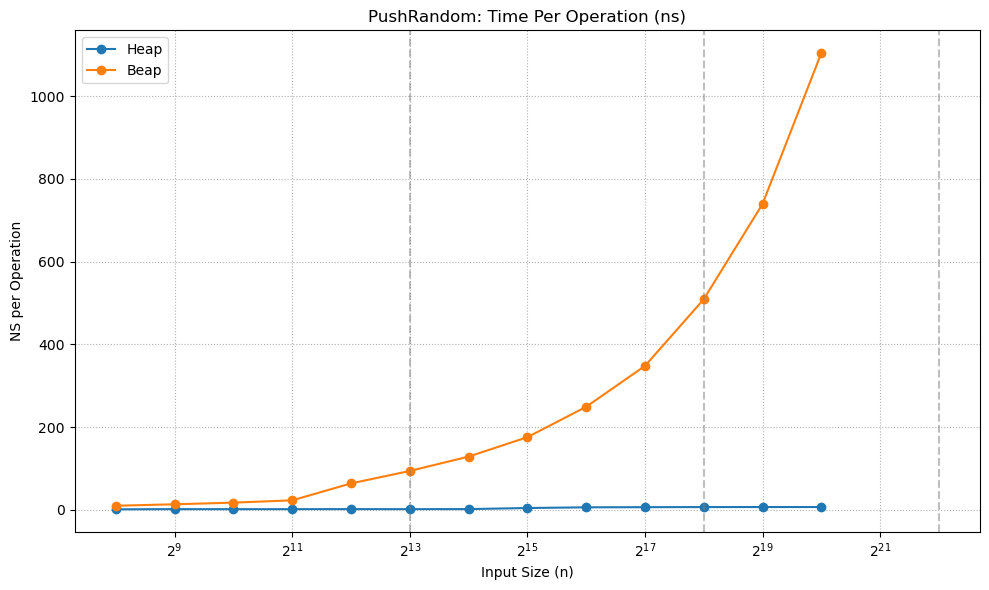

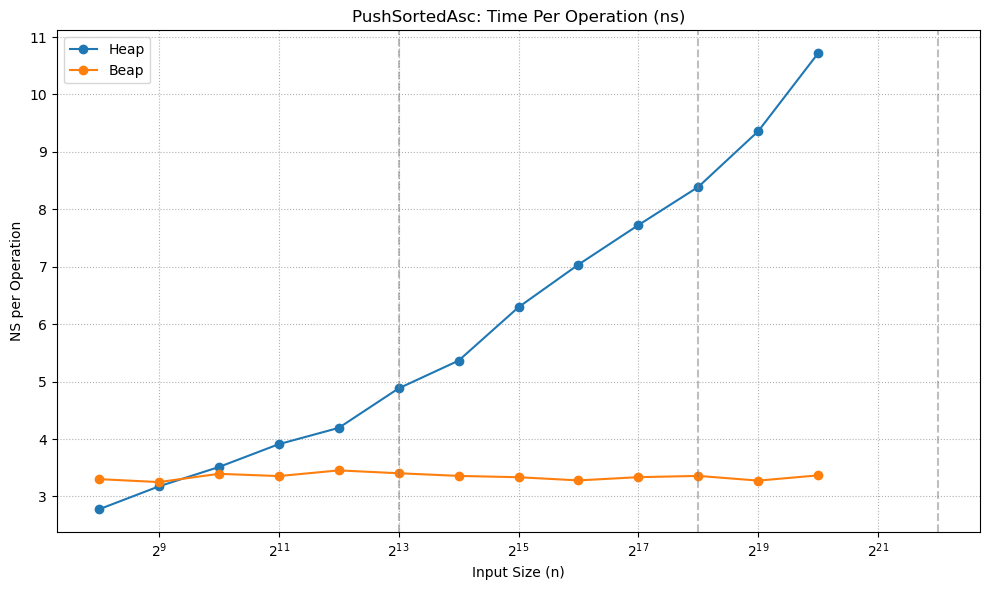

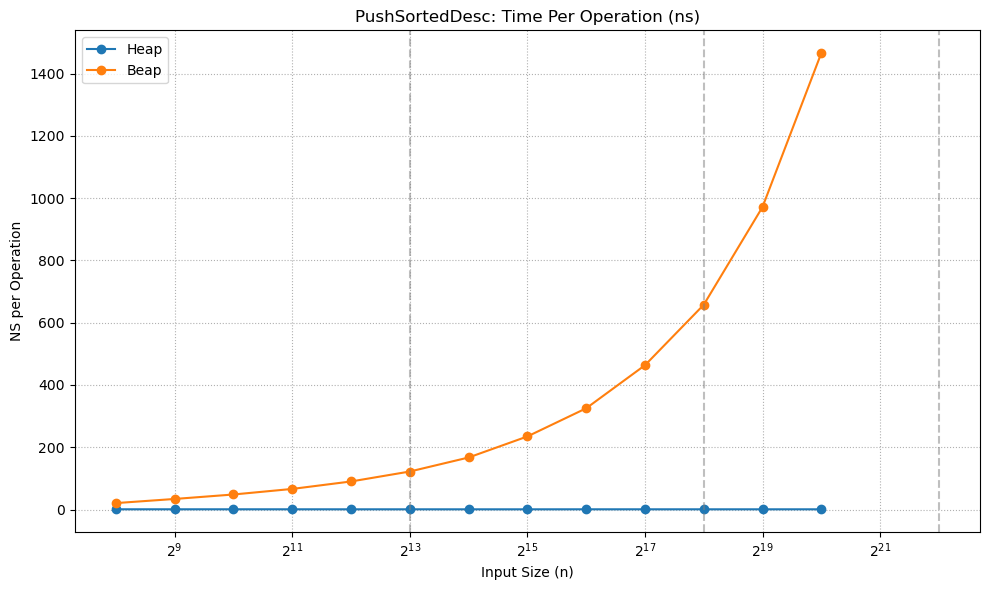

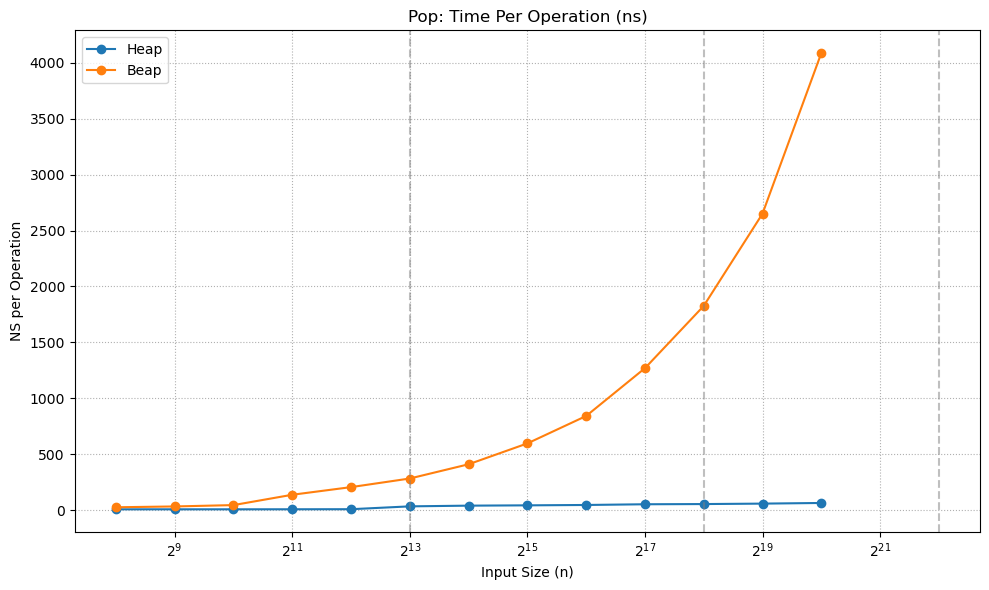

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")
bst_df = pd.read_csv("bench_bst.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None

for df in [heap_df, beap_df]:
    df[['op', 'size']] = df['name'].apply(lambda x: pd.Series(split_name(x)))


# Focus operations
ops_to_plot = [
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
    "BM_Pop"
]

for op in ops_to_plot:
    plt.figure(figsize=(10, 6))
    
    heap_sub = heap_df[heap_df['op'] == op].sort_values("size")
    beap_sub = beap_df[beap_df['op'] == op].sort_values("size")
    
    # Calculate NS per operation
    heap_cost = heap_sub['real_time'] / heap_sub['size']
    beap_cost = beap_sub['real_time'] / beap_sub['size']
    
    # Plot
    plt.plot(heap_sub['size'], heap_cost, marker='o', label="Heap")
    plt.plot(beap_sub['size'], beap_cost, marker='o', label="Beap")
    
    plt.xscale('log', base=2)
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("NS per Operation")
    plt.title(f"{op.replace('BM_', '')}: Time Per Operation (ns)")
    plt.legend()
    
    # Optional: Cache boundary indicators
    plt.axvline(8192, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(262144, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(4194304, color='gray', linestyle='--', alpha=0.5)
    
    plt.grid(True, which="both", ls=":")
    plt.tight_layout()
    plt.show()


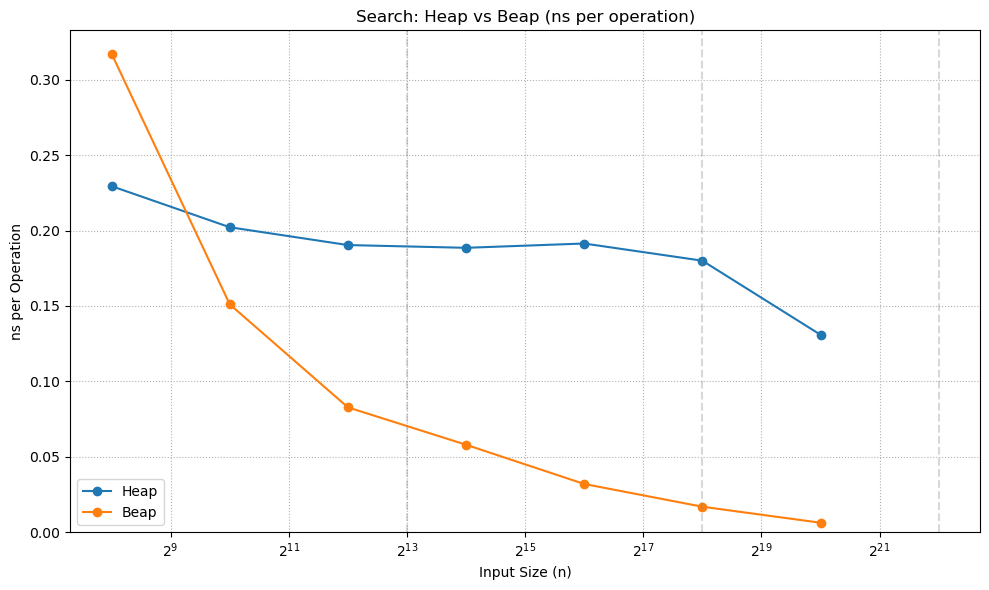

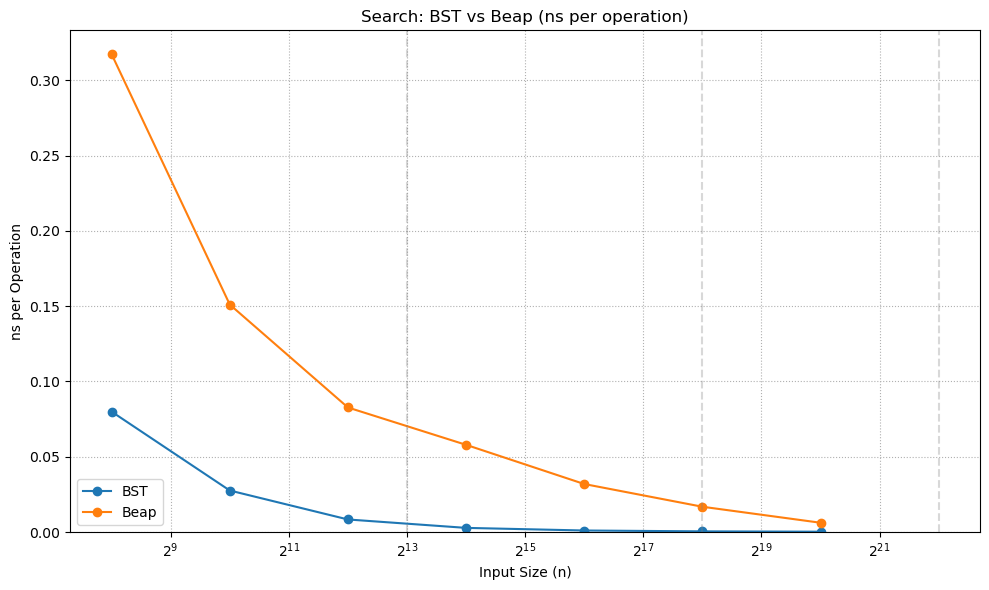

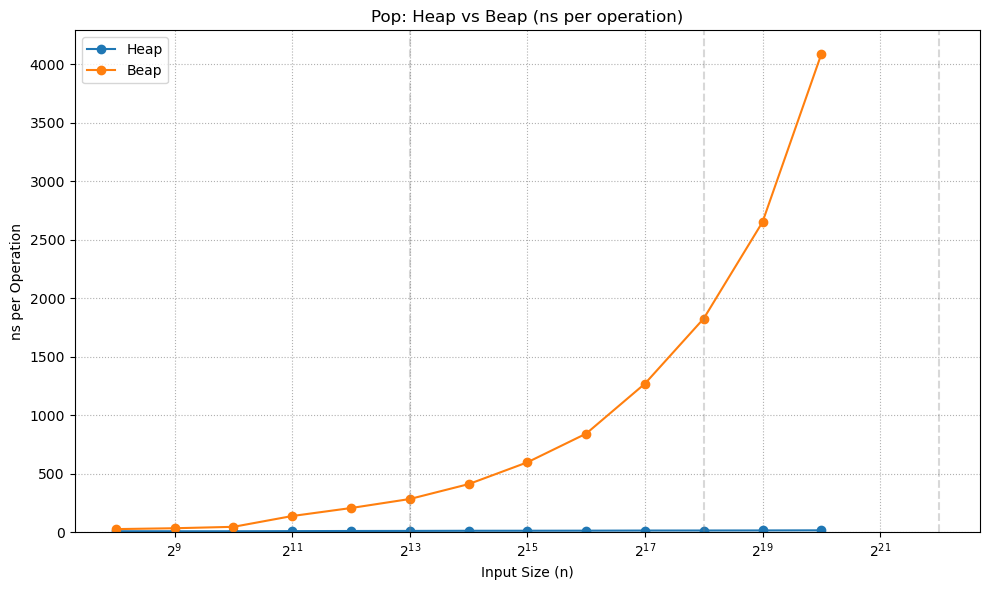

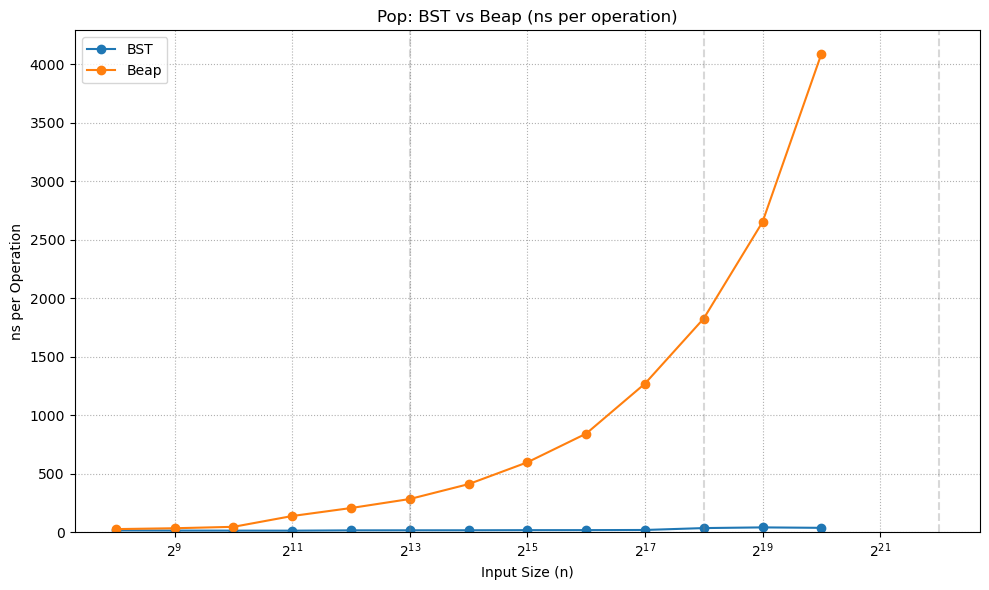

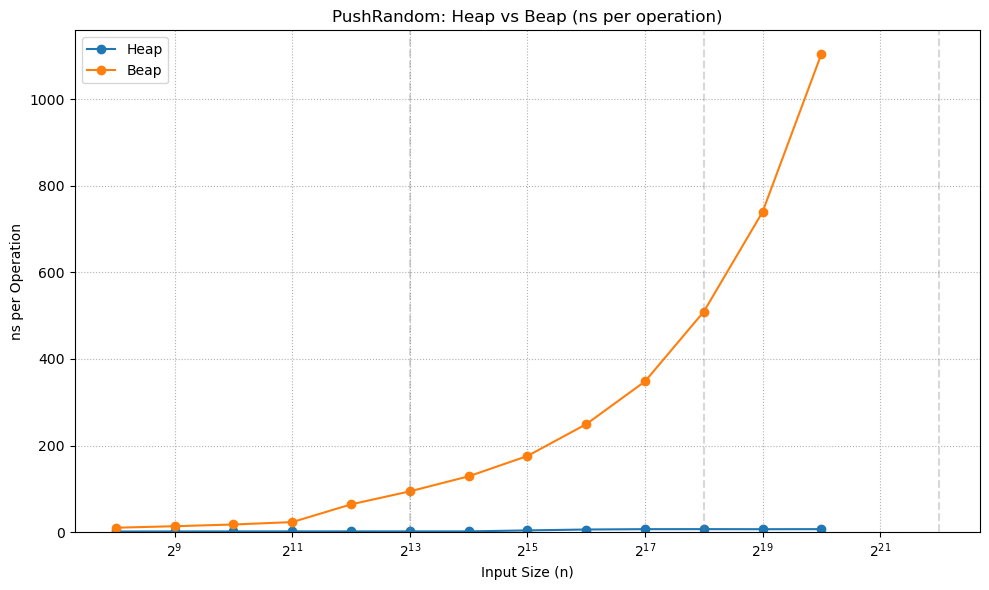

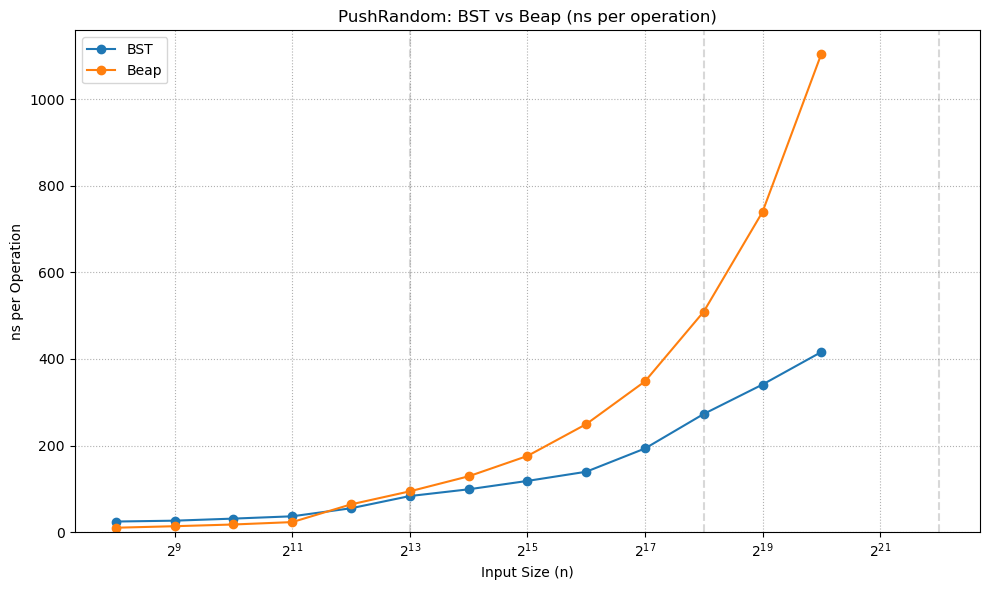

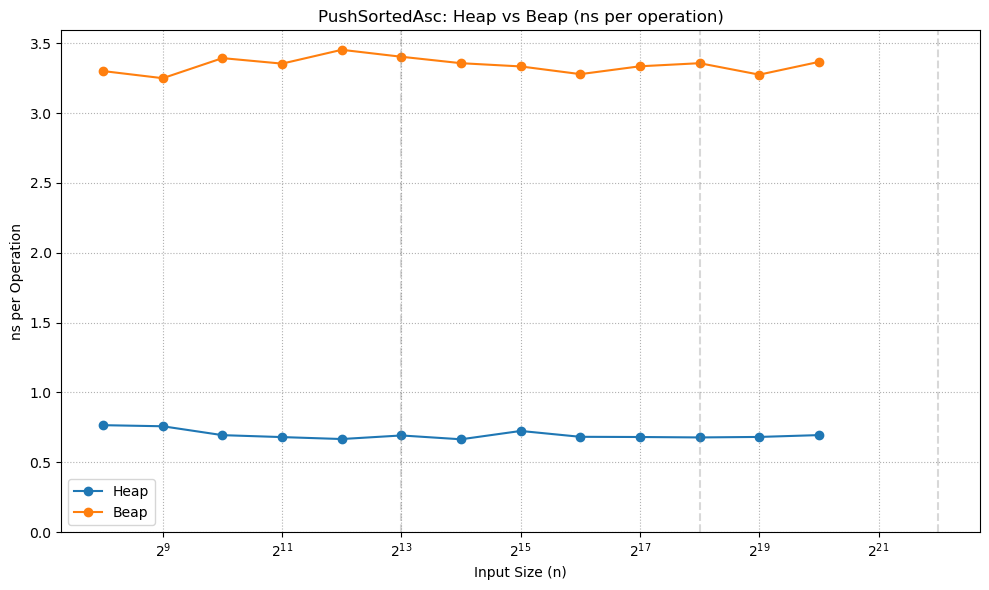

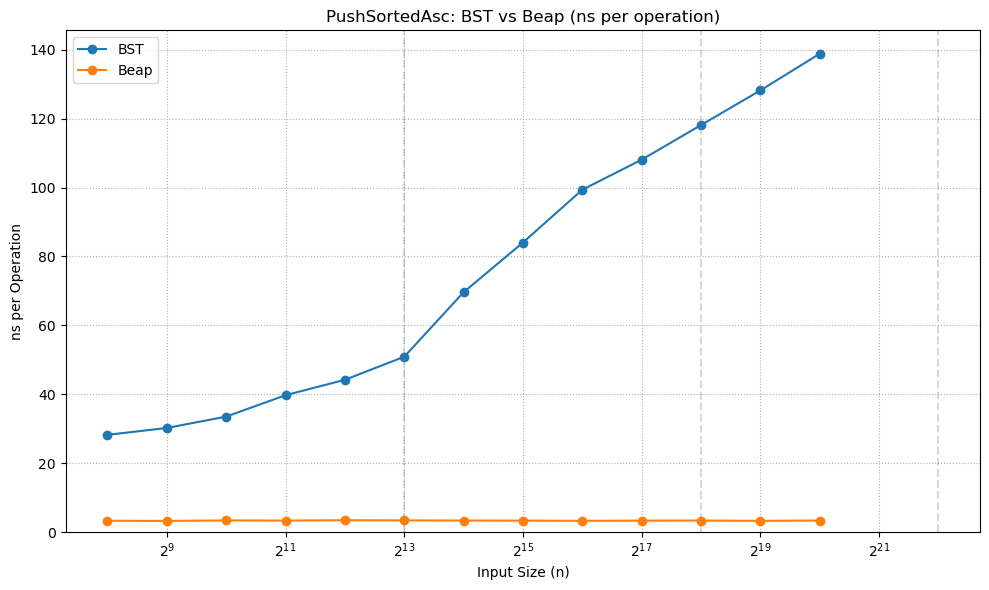

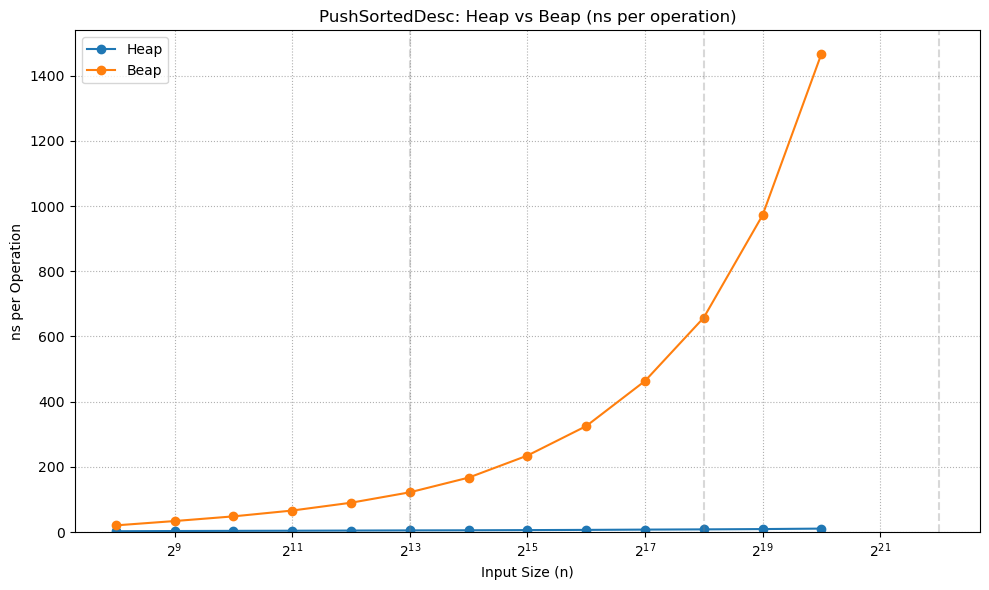

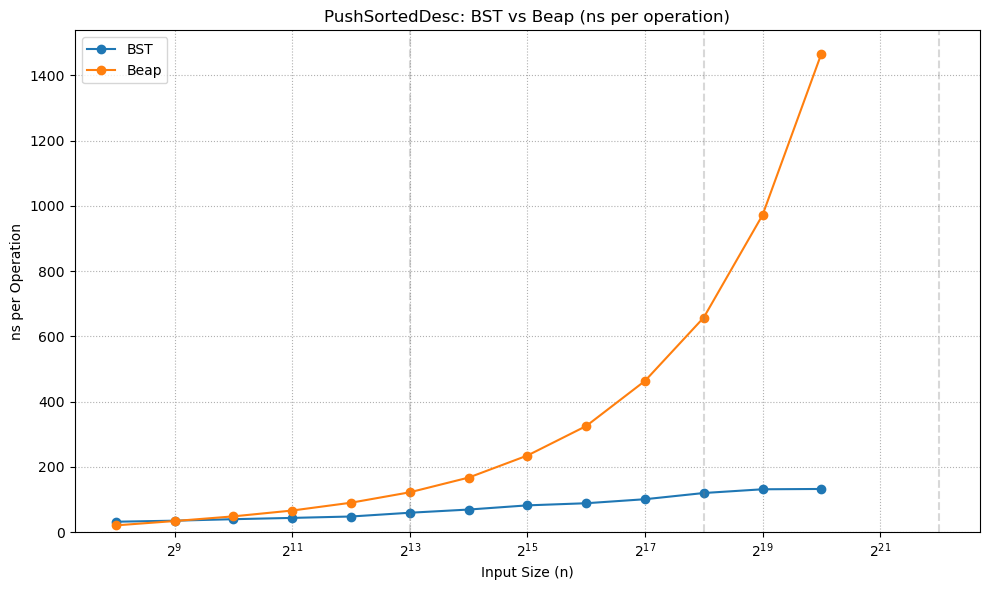

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")
bst_df  = pd.read_csv("bench_bst.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None



def add_op_and_size_columns(df):
    op_size = df['name'].apply(lambda x: pd.Series(split_name(x)))
    df['op'] = op_size[0]
    df['size'] = pd.to_numeric(op_size[1], errors="coerce")

# Add op/size for all three dataframes
for df in (heap_df, beap_df, bst_df):
    add_op_and_size_columns(df)

# Operations to focus on
ops_to_plot = [
    "BM_Search",
    "BM_Pop",
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
]

# Optional L1/L2/LLC-ish cache boundaries (sizes in elements)
BYTES_PER_ELEMENT = 4
CACHE_KIB = [32, 1024, 16384]
CACHE_LINES = [(kib * 1024) // BYTES_PER_ELEMENT for kib in CACHE_KIB]

def plot_pair(op, df_a, df_b, label_a, label_b):
    """Plot ns per operation for a given op for two structures."""
    sub_a = df_a[df_a['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_b = df_b[df_b['op'] == op].dropna(subset=['size']).sort_values('size')

    if sub_a.empty or sub_b.empty:
        print(f"Skipping {op}: missing data for {label_a} or {label_b}")
        return

    # ns per operation
    cost_a = sub_a['real_time'] / sub_a['size']
    cost_b = sub_b['real_time'] / sub_b['size']

    plt.figure(figsize=(10, 6))
    plt.plot(sub_a['size'], cost_a, marker='o', label=label_a)
    plt.plot(sub_b['size'], cost_b, marker='o', label=label_b)

    pretty_name = op.replace("BM_", "")
    plt.title(f"{pretty_name}: {label_a} vs {label_b} (ns per operation)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")
    
    
    # Axes start from origin (0, 0)
    plt.xscale('log', base=2)
    #plt.yscale('log', base=2)
    # plt.xlim(left=0)
    plt.ylim(bottom=0)

    # Optional cache boundary indicators
    for x in CACHE_LINES:
        plt.axvline(x, color='gray', linestyle='--', alpha=0.3)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Generate plots:
#   - Heap vs Beap for each operation
#   - BST vs Beap for each operation
for op in ops_to_plot:
    plot_pair(op, heap_df, beap_df, "Heap", "Beap")
    plot_pair(op, bst_df,  beap_df, "BST",  "Beap")


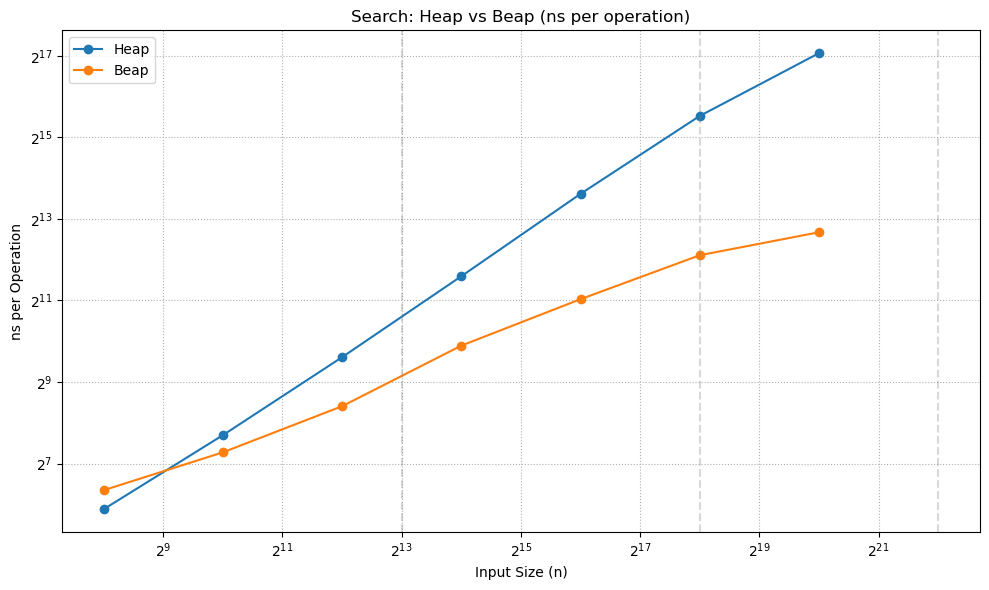

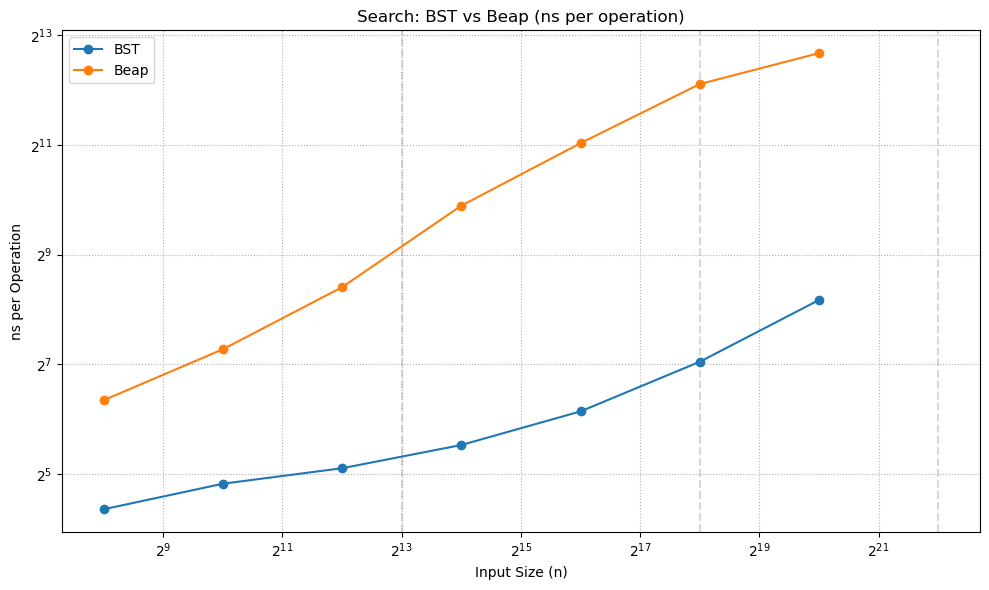

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")
bst_df  = pd.read_csv("bench_bst.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None



def add_op_and_size_columns(df):
    op_size = df['name'].apply(lambda x: pd.Series(split_name(x)))
    df['op'] = op_size[0]
    df['size'] = pd.to_numeric(op_size[1], errors="coerce")

# Add op/size for all three dataframes
for df in (heap_df, beap_df, bst_df):
    add_op_and_size_columns(df)

# Operations to focus on
ops_to_plot = [
    "BM_Search"
]

# Optional L1/L2/LLC-ish cache boundaries (sizes in elements)
BYTES_PER_ELEMENT = 4
CACHE_KIB = [32, 1024, 16384]
CACHE_LINES = [(kib * 1024) // BYTES_PER_ELEMENT for kib in CACHE_KIB]

def plot_pair(op, df_a, df_b, label_a, label_b):
    """Plot ns per operation for a given op for two structures."""
    sub_a = df_a[df_a['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_b = df_b[df_b['op'] == op].dropna(subset=['size']).sort_values('size')

    if sub_a.empty or sub_b.empty:
        print(f"Skipping {op}: missing data for {label_a} or {label_b}")
        return

    # ns per operation
    cost_a = sub_a['real_time'] 
    cost_b = sub_b['real_time'] 

    plt.figure(figsize=(10, 6))
    plt.plot(sub_a['size'], cost_a, marker='o', label=label_a)
    plt.plot(sub_b['size'], cost_b, marker='o', label=label_b)

    pretty_name = op.replace("BM_", "")
    plt.title(f"{pretty_name}: {label_a} vs {label_b} (ns per operation)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")
    
    
    # Axes start from origin (0, 0)
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    # plt.xlim(left=0)
    #plt.ylim(bottom=0)

    # Optional cache boundary indicators
    for x in CACHE_LINES:
        plt.axvline(x, color='gray', linestyle='--', alpha=0.3)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Generate plots:
#   - Heap vs Beap for each operation
#   - BST vs Beap for each operation
for op in ops_to_plot:
    plot_pair(op, heap_df, beap_df, "Heap", "Beap")
    plot_pair(op, bst_df,  beap_df, "BST",  "Beap")


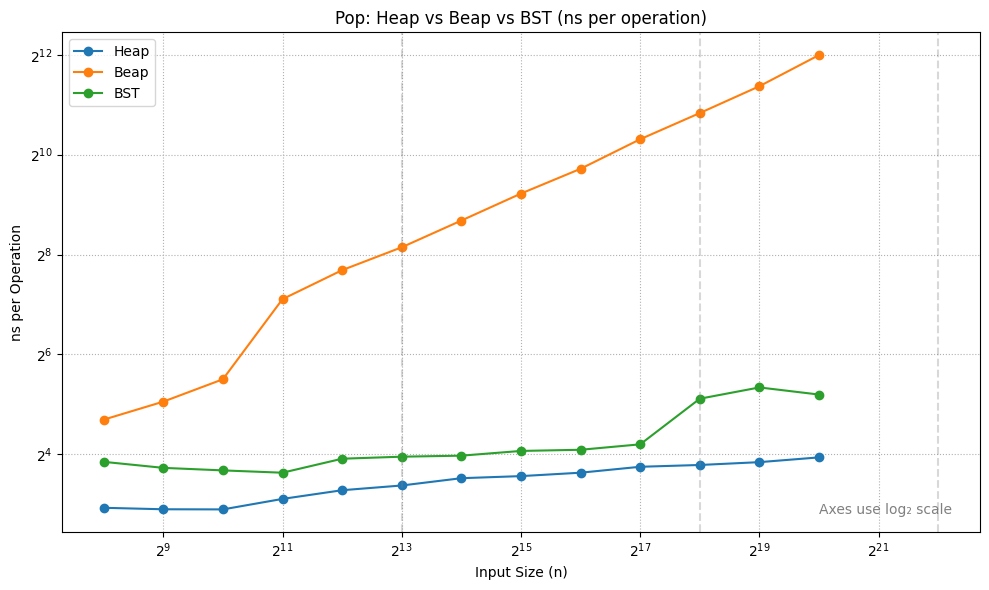

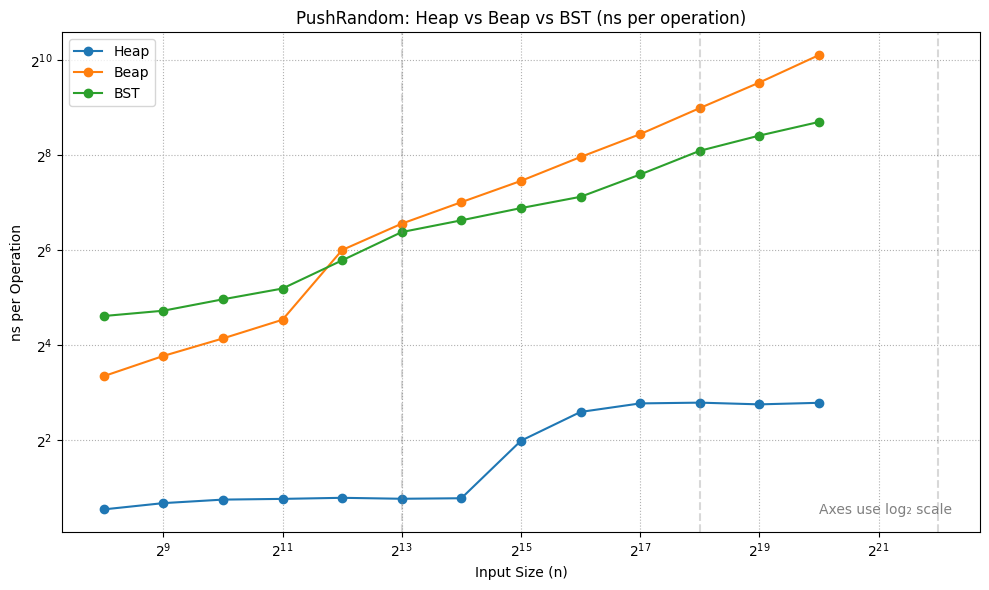

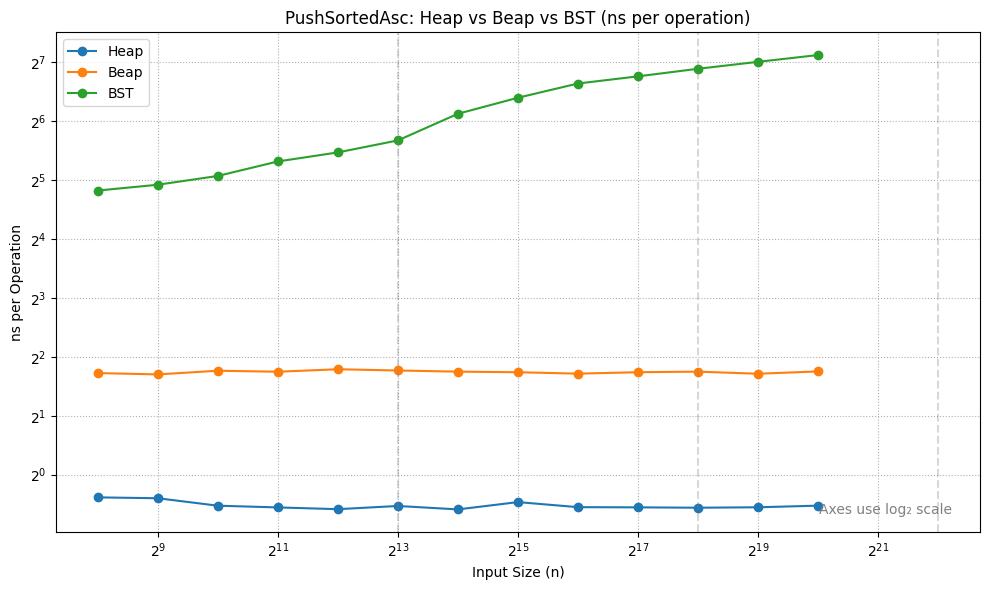

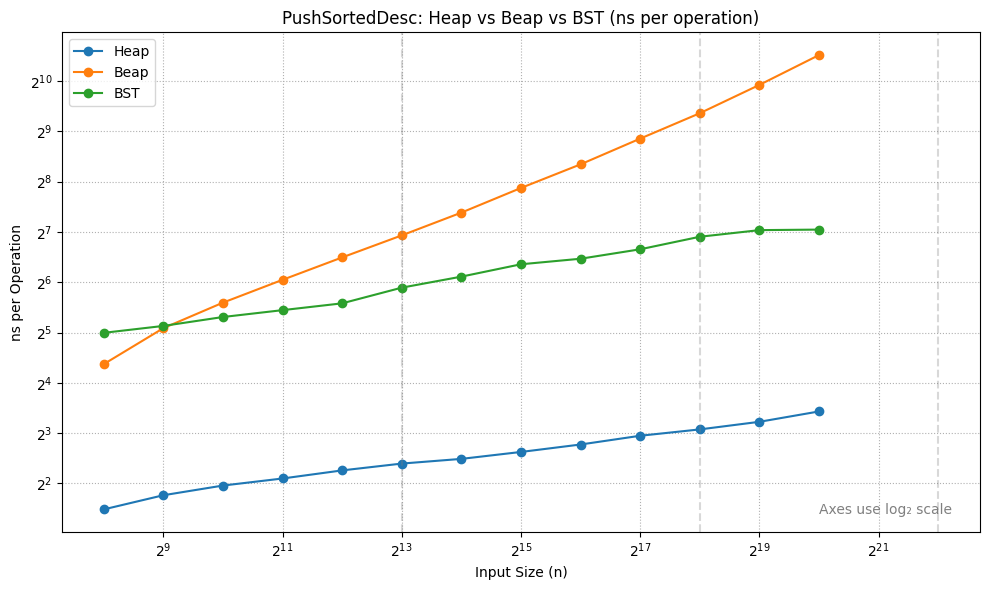

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")
bst_df  = pd.read_csv("bench_bst.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None



def add_op_and_size_columns(df):
    op_size = df['name'].apply(lambda x: pd.Series(split_name(x)))
    df['op'] = op_size[0]
    df['size'] = pd.to_numeric(op_size[1], errors="coerce")

# Add op/size for all three dataframes
for df in (heap_df, beap_df, bst_df):
    add_op_and_size_columns(df)

# Operations to focus on
ops_to_plot = [
    #"BM_Search",
    "BM_Pop",
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
]


# Optional L1/L2/LLC-ish cache boundaries (sizes in elements)
BYTES_PER_ELEMENT = 4
CACHE_KIB = [32, 1024, 16384]
CACHE_LINES = [(kib * 1024) // BYTES_PER_ELEMENT for kib in CACHE_KIB]

def plot_pair(op, df_a, df_b, df_c, label_a, label_b, label_c):
    """Plot ns per operation for a given op for two structures."""
    sub_a = df_a[df_a['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_b = df_b[df_b['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_c = df_c[df_c['op'] == op].dropna(subset=['size']).sort_values('size')

    if sub_a.empty or sub_b.empty or sub_c.empty:
        print(f"Skipping {op}: missing data for {label_a} or {label_b} or {label_c}")
        return

    # ns per operation
    cost_a = sub_a['real_time'] / sub_a['size']
    cost_b = sub_b['real_time'] / sub_b['size']
    cost_c = sub_c['real_time'] / sub_c['size']

    plt.figure(figsize=(10, 6))
    plt.plot(sub_a['size'], cost_a, marker='o', label=label_a)
    plt.plot(sub_b['size'], cost_b, marker='o', label=label_b)
    plt.plot(sub_c['size'], cost_c, marker='o', label=label_c)

    pretty_name = op.replace("BM_", "")
    plt.title(f"{pretty_name}: {label_a} vs {label_b} vs {label_c} (ns per operation)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")

    plt.annotate(
        "Axes use log₂ scale",
        xy=(0.97, 0.03),
        xycoords="axes fraction",
        ha="right",
        va="bottom",
        fontsize=10,
        color="gray"
    )

    
    # Axes start from origin (0, 0)
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    # plt.xlim(left=0)
    # plt.ylim(bottom=0)

    # Optional cache boundary indicators
    for x in CACHE_LINES:
        plt.axvline(x, color='gray', linestyle='--', alpha=0.3)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Generate plots:
#   - Heap vs Beap for each operation
#   - BST vs Beap for each operation
for op in ops_to_plot:
    plot_pair(op, heap_df, beap_df, bst_df,  "Heap", "Beap", "BST")
    #plot_pair(op, bst_df,  beap_df, "BST",  "Beap")


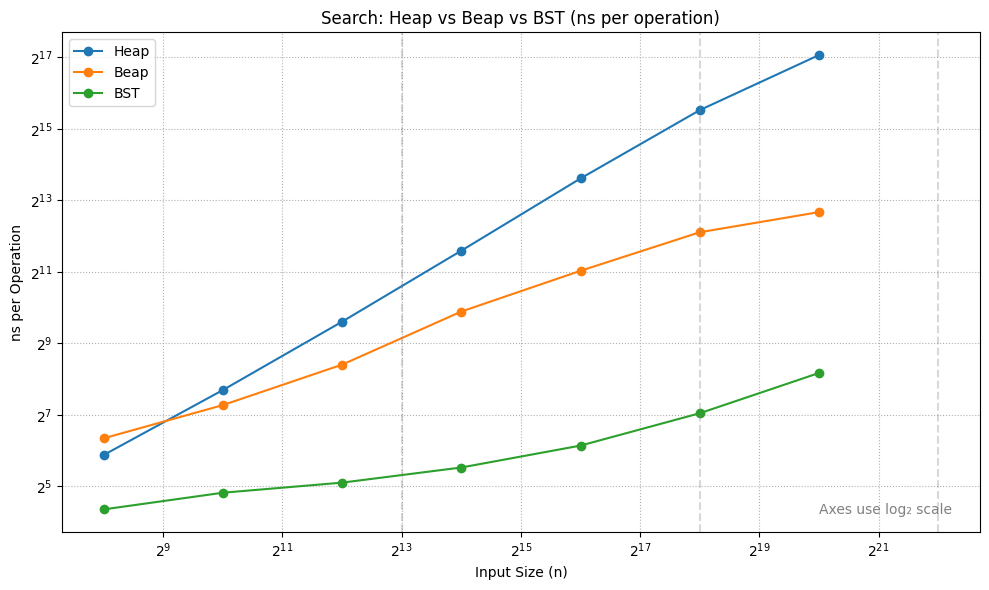

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")
bst_df  = pd.read_csv("bench_bst.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None



def add_op_and_size_columns(df):
    op_size = df['name'].apply(lambda x: pd.Series(split_name(x)))
    df['op'] = op_size[0]
    df['size'] = pd.to_numeric(op_size[1], errors="coerce")

# Add op/size for all three dataframes
for df in (heap_df, beap_df, bst_df):
    add_op_and_size_columns(df)

# Operations to focus on
ops_to_plot = [
    "BM_Search",
]


# Optional L1/L2/LLC-ish cache boundaries (sizes in elements)
BYTES_PER_ELEMENT = 4
CACHE_KIB = [32, 1024, 16384]
CACHE_LINES = [(kib * 1024) // BYTES_PER_ELEMENT for kib in CACHE_KIB]

def plot_pair(op, df_a, df_b, df_c, label_a, label_b, label_c):
    """Plot ns per operation for a given op for two structures."""
    sub_a = df_a[df_a['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_b = df_b[df_b['op'] == op].dropna(subset=['size']).sort_values('size')
    sub_c = df_c[df_c['op'] == op].dropna(subset=['size']).sort_values('size')

    if sub_a.empty or sub_b.empty or sub_c.empty:
        print(f"Skipping {op}: missing data for {label_a} or {label_b} or {label_c}")
        return

    # ns per operation
    cost_a = sub_a['real_time'] 
    cost_b = sub_b['real_time'] 
    cost_c = sub_c['real_time'] 

    plt.figure(figsize=(10, 6))
    plt.plot(sub_a['size'], cost_a, marker='o', label=label_a)
    plt.plot(sub_b['size'], cost_b, marker='o', label=label_b)
    plt.plot(sub_c['size'], cost_c, marker='o', label=label_c)

    pretty_name = op.replace("BM_", "")
    plt.title(f"{pretty_name}: {label_a} vs {label_b} vs {label_c} (ns per operation)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")

    plt.annotate(
        "Axes use log₂ scale",
        xy=(0.97, 0.03),
        xycoords="axes fraction",
        ha="right",
        va="bottom",
        fontsize=10,
        color="gray"
    )

    
    # Axes start from origin (0, 0)
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    # plt.xlim(left=0)
    #plt.ylim(bottom=0)

    # Optional cache boundary indicators
    for x in CACHE_LINES:
        plt.axvline(x, color='gray', linestyle='--', alpha=0.3)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Generate plots:
#   - Heap vs Beap for each operation
#   - BST vs Beap for each operation
for op in ops_to_plot:
    plot_pair(op, heap_df, beap_df, bst_df,  "Heap", "Beap", "BST")
    # plot_pair(op, bst_df,  beap_df, "BST",  "Beap")


In [93]:
import re 


df_beap_original = pd.read_csv("bench_beap.csv")
df_beap_original

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message
0,BM_Baseline/256,85518937,7.387630e+00,7.672760e+00,ns,NaN,NaN,NaN,NaN,NaN
1,BM_Baseline/1024,19754259,3.382400e+01,3.519620e+01,ns,NaN,NaN,NaN,NaN,NaN
2,BM_Baseline/4096,44932375,1.443070e+01,1.502200e+01,ns,NaN,NaN,NaN,NaN,NaN
3,BM_Baseline/16384,46725140,1.388270e+01,1.445180e+01,ns,NaN,NaN,NaN,NaN,NaN
4,BM_Baseline/65536,45377740,1.457550e+01,1.517470e+01,ns,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
68,BM_RemoveValue/4096,881,6.989970e+05,7.276070e+05,ns,NaN,5629410.0,NaN,NaN,NaN
69,BM_RemoveValue/16384,114,5.427160e+06,5.641570e+06,ns,NaN,2904160.0,NaN,NaN,NaN
70,BM_RemoveValue/65536,16,4.218660e+07,4.377030e+07,ns,NaN,1497270.0,NaN,NaN,NaN
71,BM_RemoveValue/262144,2,3.476010e+08,3.606490e+08,ns,NaN,726867.0,NaN,NaN,NaN


In [94]:
# Add two new columns: Operations and Size
# print(df_beap_original.head())

df_beap_original["Operations"] = df_beap_original["name"].str.split("/").str[0]
df_beap_original["Size"] = df_beap_original["name"].str.split("/").str[1]
df_beap_original["Size"] = df_beap_original["Size"].astype("float64")
# print(df_beap_original.head())

# group by operations
groups = df_beap_original.groupby(["Operations"])
df_old_bms = {}
for name, df in groups:
    df_old_bms[name[0]] = df.drop("Operations", axis=1)
    
    print(df_old_bms[name[0]])
    # print(name[0])
# print(df_beap_original.dtypes)

                  name  iterations  real_time  cpu_time time_unit  \
0      BM_Baseline/256    85518937    7.38763   7.67276        ns   
1     BM_Baseline/1024    19754259   33.82400  35.19620        ns   
2     BM_Baseline/4096    44932375   14.43070  15.02200        ns   
3    BM_Baseline/16384    46725140   13.88270  14.45180        ns   
4    BM_Baseline/65536    45377740   14.57550  15.17470        ns   
5   BM_Baseline/262144    45302515   14.35300  14.94250        ns   
6  BM_Baseline/1048576    43803060   14.55920  15.15560        ns   

   bytes_per_second  items_per_second  label  error_occurred  error_message  \
0               NaN               NaN    NaN             NaN            NaN   
1               NaN               NaN    NaN             NaN            NaN   
2               NaN               NaN    NaN             NaN            NaN   
3               NaN               NaN    NaN             NaN            NaN   
4               NaN               NaN    NaN        

In [95]:
bench_dir = "benchmark_results/"
new_bench = [
    "bench_beap_BM_PushSortedDesc.csv", "bench_beap_BM_PushSortedAsc.csv", 
    "bench_beap_BM_PushRandom.csv", "bench_beap_BM_Pop.csv", 
    "bench_beap_BM_Search.csv","bench_beap_BM_RemoveValue.csv"
    ]

df_new_bms = {}

for bm_file in new_bench:
    entry = re.search(r".*_(BM_.*)\.csv", bm_file).group(1)
    df_new_bms[entry] = pd.read_csv(bench_dir + bm_file)
    df_new_bms[entry]["Size"] = df_new_bms[entry]["name"].str.split("/").str[1]
    df_new_bms[entry]["Size"] = df_new_bms[entry]["Size"].astype("float64")
    # print(df_new_bms[entry].head())
    print(entry)


BM_PushSortedDesc
BM_PushSortedAsc
BM_PushRandom
BM_Pop
BM_Search
BM_RemoveValue


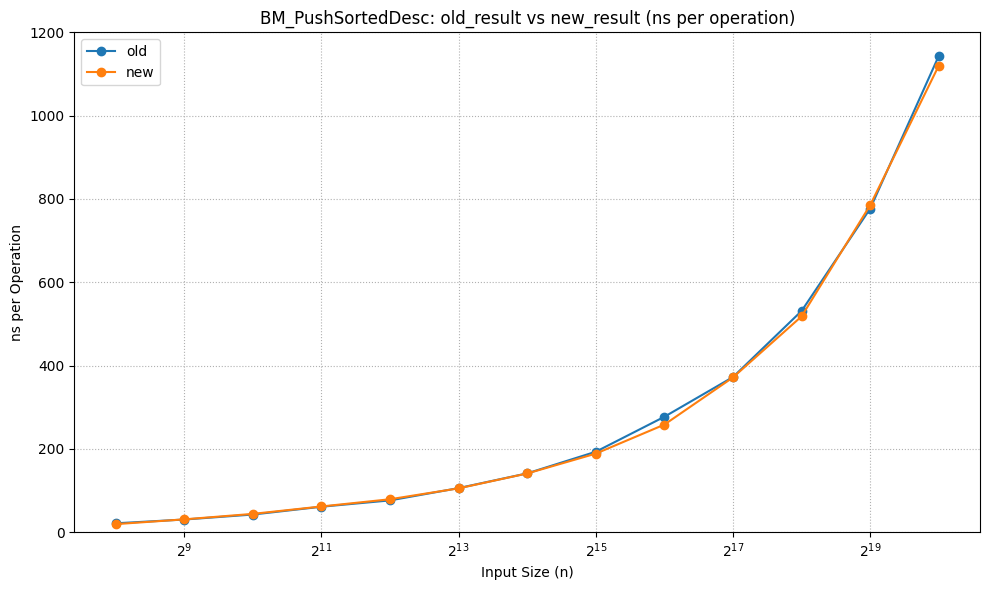

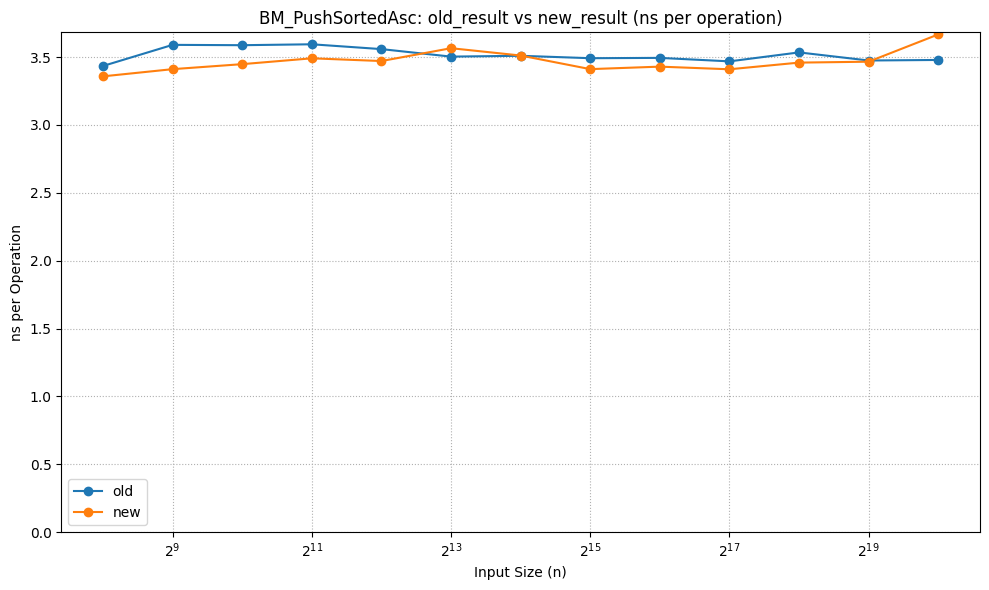

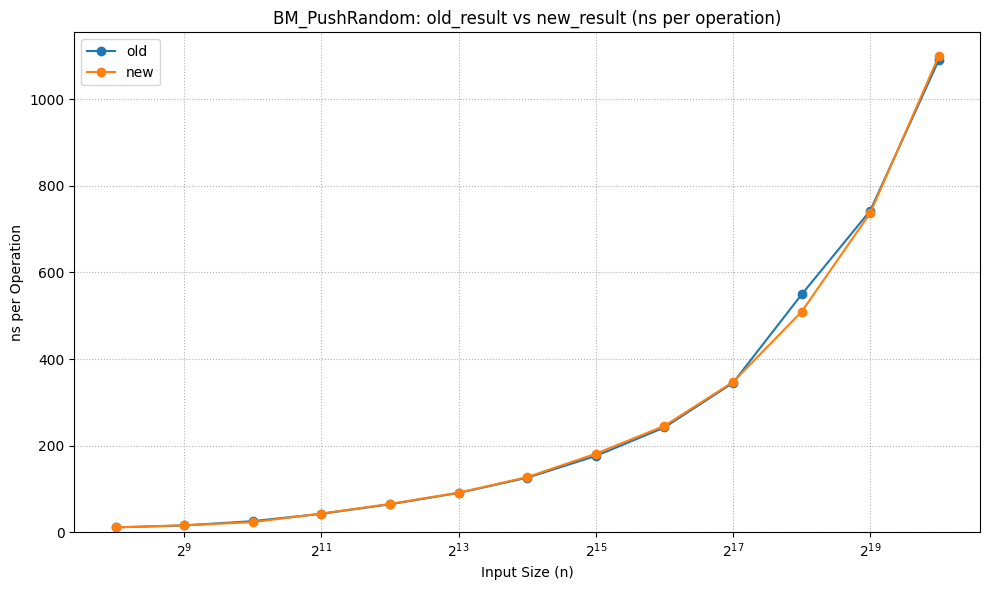

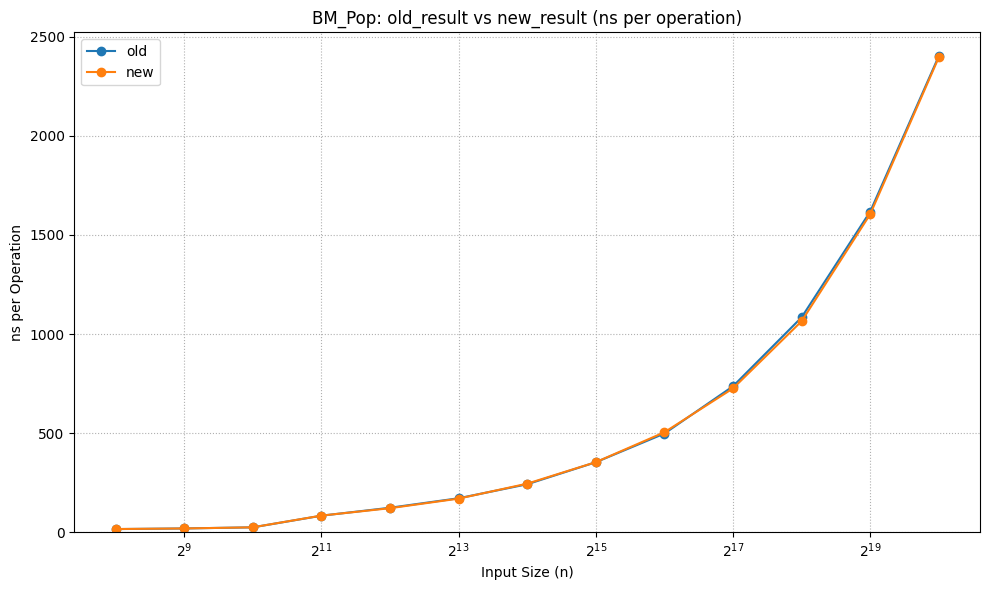

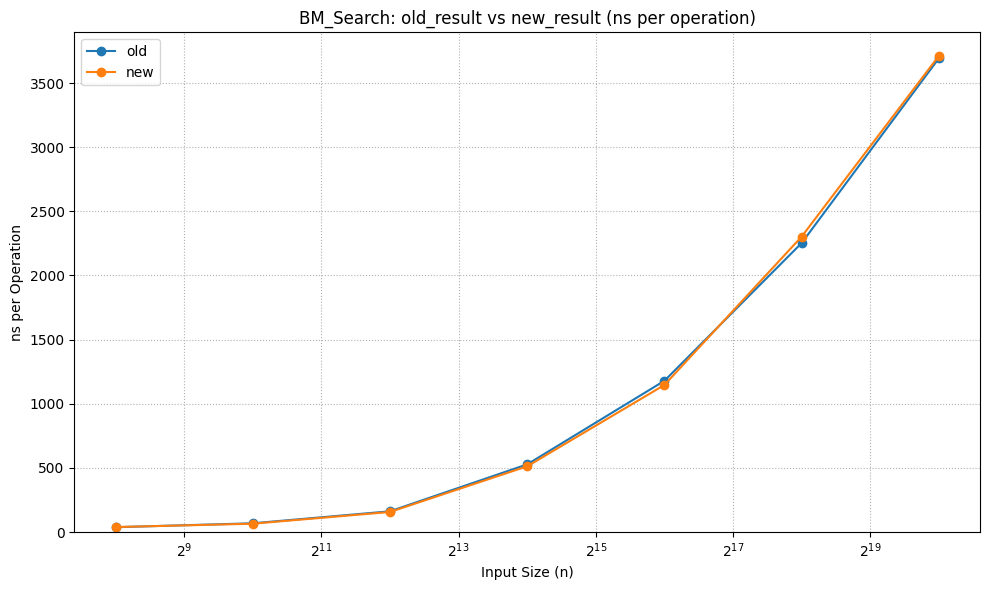

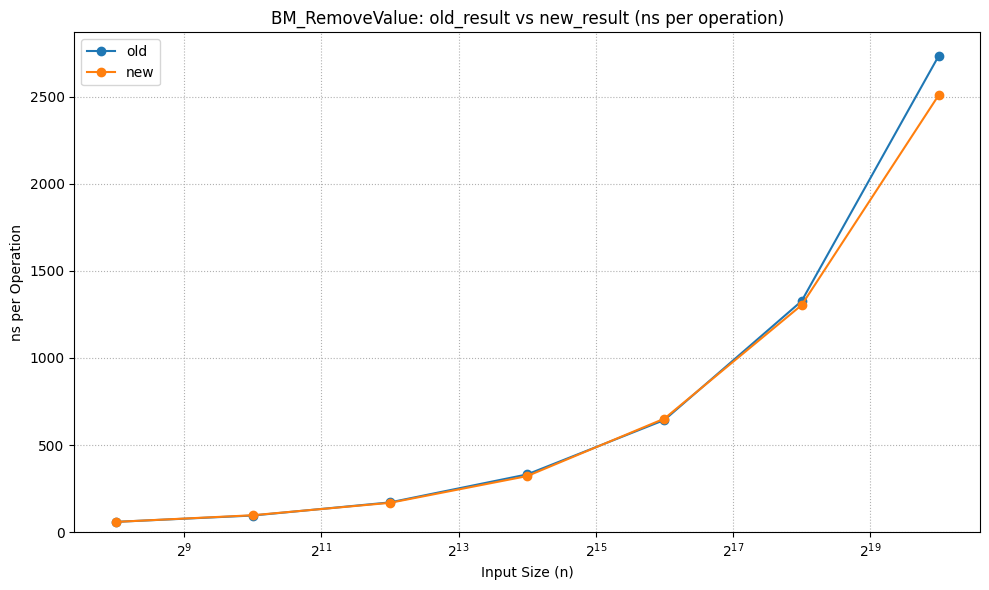

In [96]:


def plotGraph(plt, x, y, label):
    plt.plot(x, y, marker='o', label=label)


operations = new_bench = [
    "BM_PushSortedDesc", "BM_PushSortedAsc", 
    "BM_PushRandom", "BM_Pop", 
    "BM_Search","BM_RemoveValue"
    ]

for op in operations:
    time_old = df_old_bms[op]["real_time"]
    time_new = df_new_bms[op]["real_time"]
    #print(time_new) 
    if op != "BM_Search":
        time_old = time_old / df_old_bms[op]["Size"]
        time_new = time_new / df_new_bms[op]["Size"]

    
    #print(df_old_bms[op]["Size"])
    plt.figure(figsize=(10,6))
    plt.title(f"{op}: {"old_result"} vs {"new_result"} (ns per operation)")
    
    plotGraph(plt, df_old_bms[op]["Size"], time_old, "old")
    plotGraph(plt, df_new_bms[op]["Size"], time_new, "new")
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")

    plt.xscale('log', base=2)
    plt.ylim(bottom=0)
    #plt.yscale('log', base=2)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()
        
    
# plt.xlabel("Input Size (n)")
# plt.ylabel("ns per Operation")

In [ ]:
# now plot the graphs
for values in df_old_bms.values():
    values = values.sort_values("Size")

for values in df_new_bms.values():
    values = values.sort_values("Size")

for (old_key, old_df), (new_key, new_df) in zip(df_old_bms.items(), df_new_bms.items()):
    # what am i plotting
    # plotting time against size
    if old_key == "BM_Baseline":
        continue
        
    time_old = old_df["real_time"]
    time_new = new_df["real_time"]

    if old_key != "BM_Search":
        time_old = time_old / old_df["Size"]
        time_new = time_new / new_df["Size"]

    plt.figure(figsize=(10, 6))
    plt.plot(old_df['Size'], time_old, marker='o', label="old_beap")
    plt.plot(new_df['Size'], time_new, marker='o', label="new_beap")
    plt.xlabel("Input Size (n)")
    plt.ylabel("ns per Operation")

    plt.title(f"{old_key}: {"old_result"} vs {"new_result"} (ns per operation)")
    plt.annotate(
        "Axes use log₂ scale",
        xy=(0.97, 0.03),
        xycoords="axes fraction",
        ha="right",
        va="bottom",
        fontsize=10,
        color="gray"
    )

    plt.xscale('log', base=2)
    #plt.yscale('log', base=2)

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #print(old_key)
    
    